In [ ]:
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install plotly

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_parquet("preprocessed_data_A.parquet")
df["Victim IP Number"] = df["Victim IP"].str.extract(r"IP_(\d+)").astype(int)
df["Type_Original"] = df["Type"]
df = pd.get_dummies(df, columns=['Type'])
df = df.rename(columns={"Type_Original": "Type"})
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'preprocessed_data_A.parquet'

In [ ]:
df["Attack code"].unique()

array(['High volume traffic', 'Suspicious traffic', 'DNS', 'Generic UDP',
       'CLDAP', 'DNS, High volume traffic', 'SNMP, High volume traffic',
       'DNS, SNMP, High volume traffic',
       'DNS, SNMP, IPv4 fragmentation, High volume traffic',
       'DNS, SNMP, IPv4 fragmentation', 'DNS, SNMP', 'SNMP', 'CoAP',
       'Generic UDP, RPC', 'Sentinel', 'SSDP', 'NTP, SSDP',
       'NTP, SSDP, High volume traffic', 'SSDP, High volume traffic',
       'NTP', 'CoAP, High volume traffic', 'CLDAP, High volume traffic',
       'IPv4 fragmentation', 'NTP, RDP', 'DNS, NTP', 'DNS, NTP, RDP',
       'NTP, High volume traffic', 'TCP Anomaly', 'SYN Attack',
       'TCP Anomaly, ACK Attack', 'Suspicious traffic, NTP',
       'Suspicious traffic, CLDAP',
       'IPv4 fragmentation, High volume traffic',
       'Suspicious traffic, DNS', 'DNS, CLDAP, High volume traffic',
       'DNS, CLDAP', 'Suspicious traffic, DNS, IPv4 fragmentation',
       'Suspicious traffic, DNS, SYN Attack', 'Suspicious tra

# Overview

- ~ 600.000 adatelem
- részletes adatok, bár a normal traffic valóban felülreprezentált (7x)


In [ ]:
df.head()

Attack ID  Detect count Victim IP  Port number          Attack code  \
0          1             1   IP_0001         4500  High volume traffic   
1          2             1   IP_0002         4500  High volume traffic   
2          3             1   IP_0003         1200  High volume traffic   
3          3             2   IP_0003         1200  High volume traffic   
4          4             1   IP_0002         4500  High volume traffic   

   Packet speed  Data speed  Avg packet len  Source IP count  \
0       55600.0        73.0          1383.0              6.0   
1       63500.0        90.0          1506.0              1.0   
2       59700.0        79.0          1399.0              1.0   
3       65700.0        86.0          1399.0              1.0   
4       59500.0        85.0          1486.0              1.0   

                  Time  ...  Start_time_weekday_sin Start_time_weekday_cos  \
0  2022-08-08T18:09:36  ...                     0.0                    1.0   
1  2022-08-08T18:37:28  ...                     0.0                    1.0   
2  2022-08-08T18:41:25  ...                     0.0                    1.0   
3  2022-08-08T18:41:26  ...                     0.0                    1.0   
4  2022-08-08T18:47:49  ...                     0.0                    1.0   

  Start_time_dayofyear_sin Start_time_dayofyear_cos  End_time_hour_sin  \
0                -0.601624                -0.798779               -1.0   
1                -0.601624                -0.798779               -1.0   
2                -0.601624                -0.798779               -1.0   
3                -0.601624                -0.798779               -1.0   
4                -0.601624                -0.798779               -1.0   

   End_time_hour_cos  End_time_weekday_sin  End_time_weekday_cos  \
0      -1.836970e-16                   0.0                   1.0   
1      -1.836970e-16                   0.0                   1.0   
2      -1.836970e-16                   0.0                   1.0   
3      -1.836970e-16                   0.0                   1.0   
4      -1.836970e-16                   0.0                   1.0   

   End_time_dayofyear_sin  End_time_dayofyear_cos  
0               -0.601624               -0.798779  
1               -0.601624               -0.798779  
2               -0.601624               -0.798779  
3               -0.601624               -0.798779  
4               -0.601624               -0.798779  

[5 rows x 32 columns]

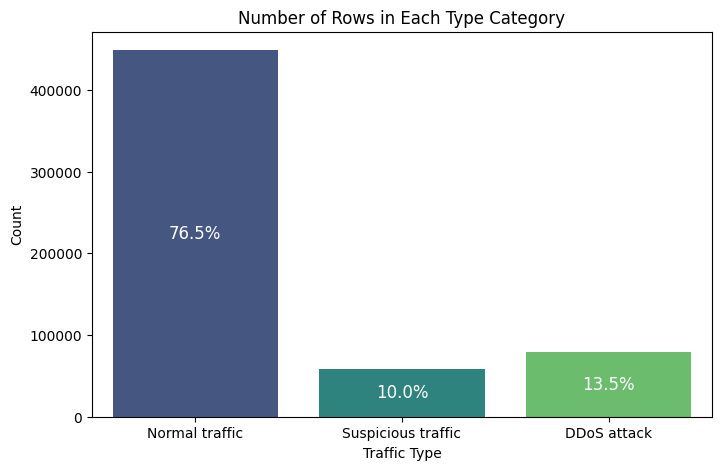

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x="Type", data=df, palette="viridis")

total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=12
    )

plt.title("Number of Rows in Each Type Category")
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.show()

# Common

In [ ]:
def plot_hist(column, bins = 50):
  plt.figure(figsize=(10, 5))
  sns.histplot(df[column], bins=bins, kde=True, color=sns.color_palette("viridis")[4])
  plt.title(f"Distribution of {column}")
  plt.xlabel(f"{column}")
  plt.ylabel("Frequency")
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')
  plt.show()

In [ ]:
def plot_type_hist(column, type, bins = 50):

  traffic_mapping = {
      "Normal traffic": 0,
      "Suspicious traffic": 2,
      "DDoS attack": 5
  }

  plt.figure(figsize=(10, 5))

  sns.histplot(df[df["Type"] == type][column],
              bins=bins, kde=True, color=sns.color_palette("viridis")[traffic_mapping[type]])

  plt.title(f"Distribution of {column} ({type})")
  plt.xlabel(f"{column}")
  plt.ylabel("Frequency")
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')

  plt.show()

In [ ]:
def plot_kde(column, bins = 50):
  plt.figure(figsize=(10, 5))

  sns.histplot(df[df["Type"] == "Normal traffic"][column], bins=bins, kde=True, color=sns.color_palette("viridis")[0], label="Normal traffic", alpha=0.5, element="step")
  sns.histplot(df[df["Type"] == "Suspicious traffic"][column], bins=bins, kde=True, color=sns.color_palette("viridis")[2], label="Suspicious traffic", alpha=0.5, element="step")
  sns.histplot(df[df["Type"] == "DDoS attack"][column], bins=bins, kde=True, color=sns.color_palette("viridis")[5], label="DDoS attack", alpha=0.5, element="step")

  plt.title(f"{column} Distribution by Traffic Type (KDE Only)")
  plt.xlabel(f"{column}")
  plt.ylabel("Density")
  plt.legend(title="Traffic Type")
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')
  plt.show()

In [ ]:
def plot_kde_norm(column, bins = 50):
  plt.figure(figsize=(10, 5))

  sns.histplot(df[df["Type"] == "Normal traffic"][column], bins=bins, kde=True,
              color=sns.color_palette("viridis")[0], label="Normal traffic",
              alpha=0.5, element="step", stat="density")

  sns.histplot(df[df["Type"] == "Suspicious traffic"][column], bins=bins, kde=True,
              color=sns.color_palette("viridis")[2], label="Suspicious traffic",
              alpha=0.5, element="step", stat="density")

  sns.histplot(df[df["Type"] == "DDoS attack"][column], bins=bins, kde=True,
              color=sns.color_palette("viridis")[5], label="DDoS attack",
              alpha=0.5, element="step", stat="density")

  plt.title(f"{column} Distribution by Traffic Type (KDE Only)")
  plt.xlabel(f"{column}")
  plt.ylabel("Density")
  plt.legend(title="Traffic Type")
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')
  plt.show()

# Packet speed

## Vizsgálatok

- teljes adaton vett eloszlás
- adott típusokon vett eloszlás
- a fentiek egymáshoz viszonyítása

## Módszerek

- hisztogram
- KDE (kernel density estimate): hozzávetőleges eloszlás vonala

## Megfigyelések

- a legszemléletesebbek a teljes eloszlás és az egymáshoz viszonyított KDE ábrák
- minden típus hasonló jelleget mutat, a normal traffic és a ddos attack típusoknál egy érdekes második, jóval kisebb csúcs is megfigyelhető

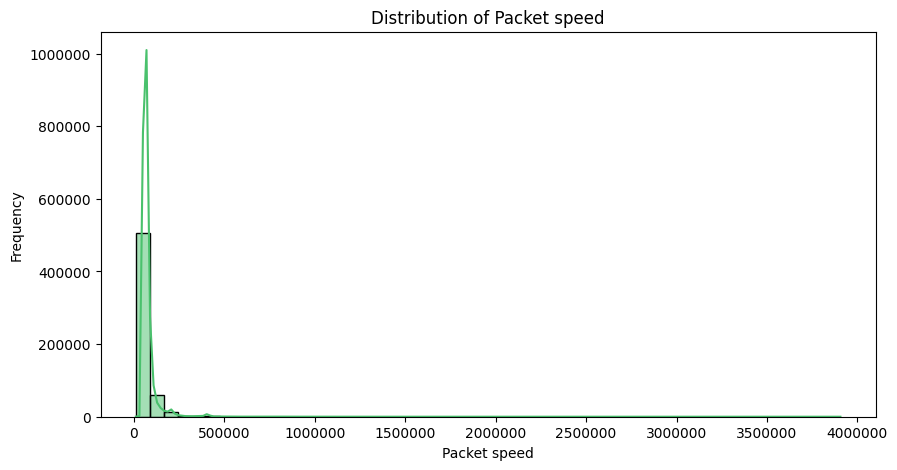

In [ ]:
plot_hist("Packet speed")

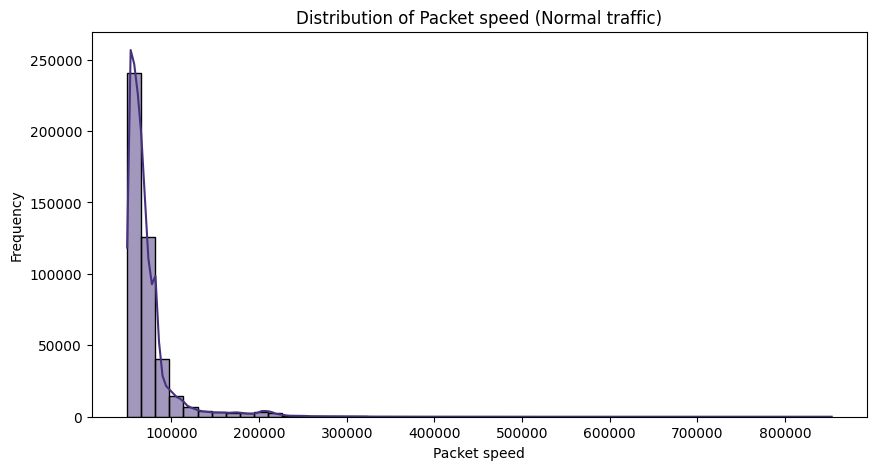

In [ ]:
plot_type_hist("Packet speed", "Normal traffic")

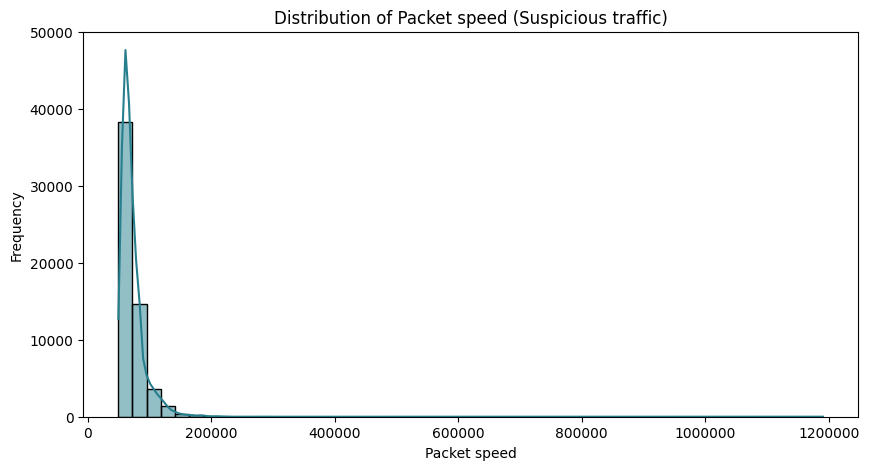

In [ ]:
plot_type_hist("Packet speed", "Suspicious traffic")

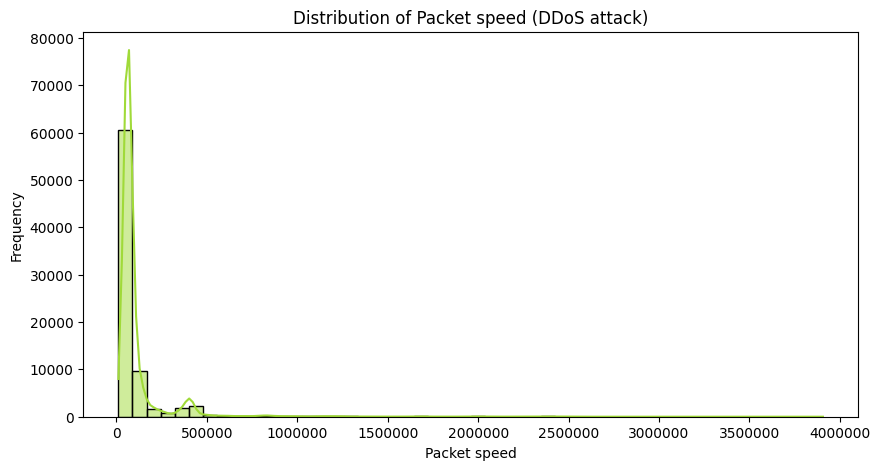

In [ ]:
plot_type_hist("Packet speed", "DDoS attack")

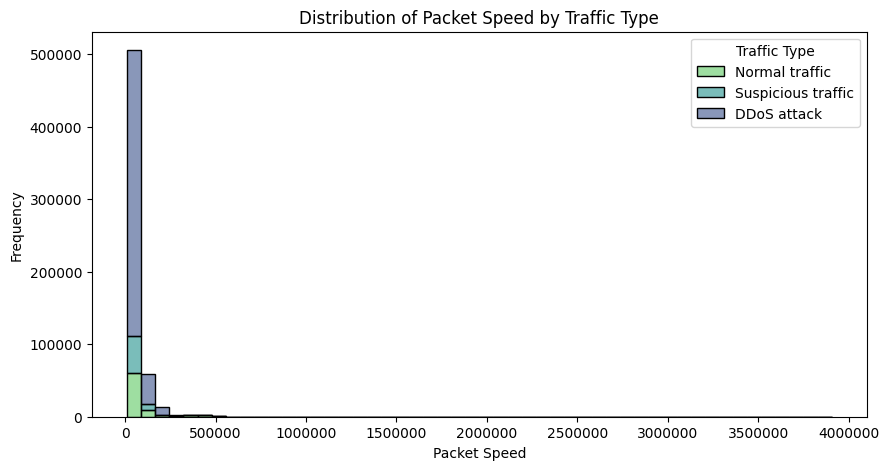

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(df, x="Packet speed", hue="Type", bins=50, palette="viridis", alpha=0.6, multiple="stack")

plt.title("Distribution of Packet Speed by Traffic Type")
plt.xlabel("Packet Speed")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title="Traffic Type", labels=["Normal traffic", "Suspicious traffic", "DDoS attack"])

plt.show()

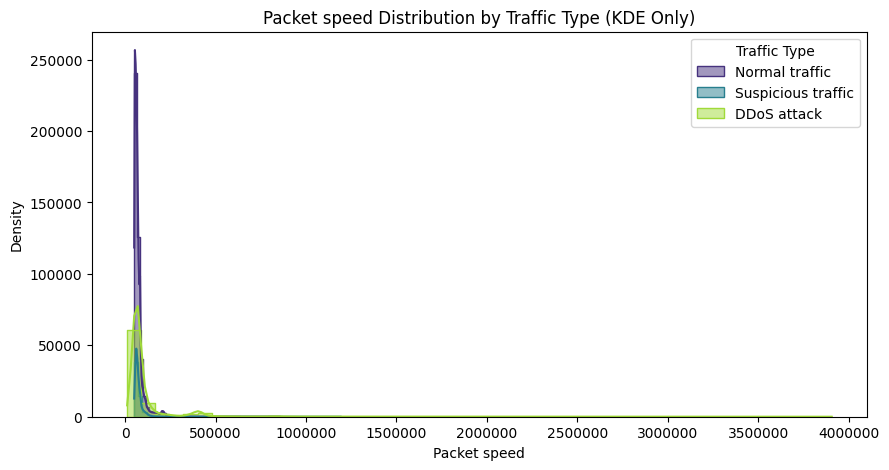

In [ ]:
plot_kde("Packet speed")

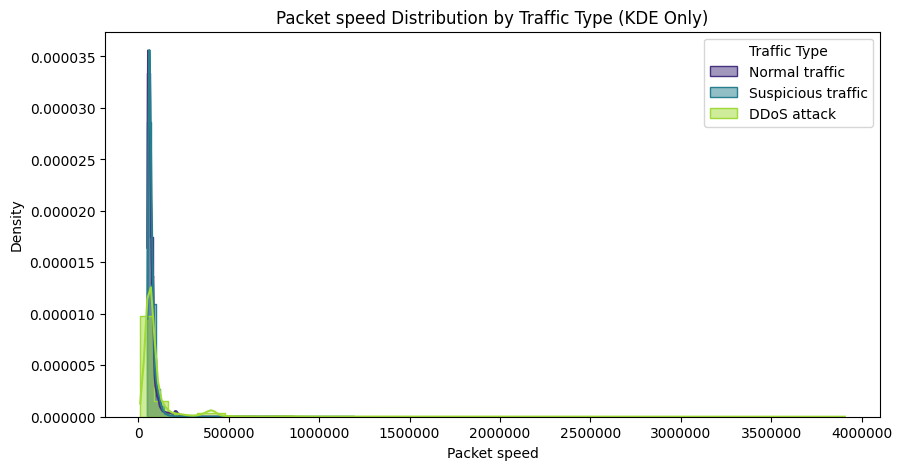

In [ ]:
plot_kde_norm("Packet speed")

# Data speed

## Vizsgálatok

- teljes adaton vett eloszlás
- adott típusokon vett eloszlás
- a fentiek egymáshoz viszonyítása

## Módszerek

- hisztogram
- KDE (kernel density estimate): hozzávetőleges eloszlás vonala

## Megfigyelések

- itt található a plot_kde_norm egyik leglátványosabb összehasonlítási előnye: a suspicious traffic és a normal traffic csúcsgörbéje teljesen egybeesik, viszont a legkisebb értékek esetén a ddos-ra hasonlít
- a suspicious traffic esetében a megszokott eloszlási (harang)görbén kívül egy számottevő csúcs van a kis sebességek esetén (ami magyarázhatja a suspicious jellemzőjét is)
- a DDoS attack jellemző értékeit a <100 tartományban veszi fel, ami megkülönbözteti a többi típustól

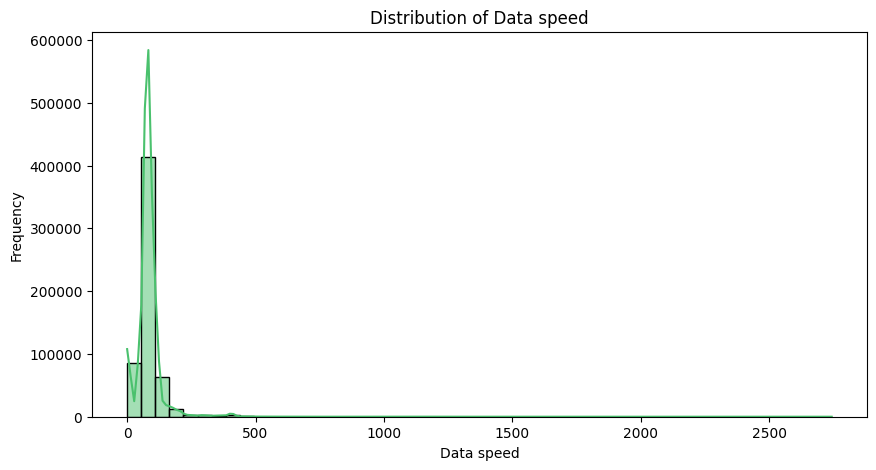

In [ ]:
plot_hist("Data speed")

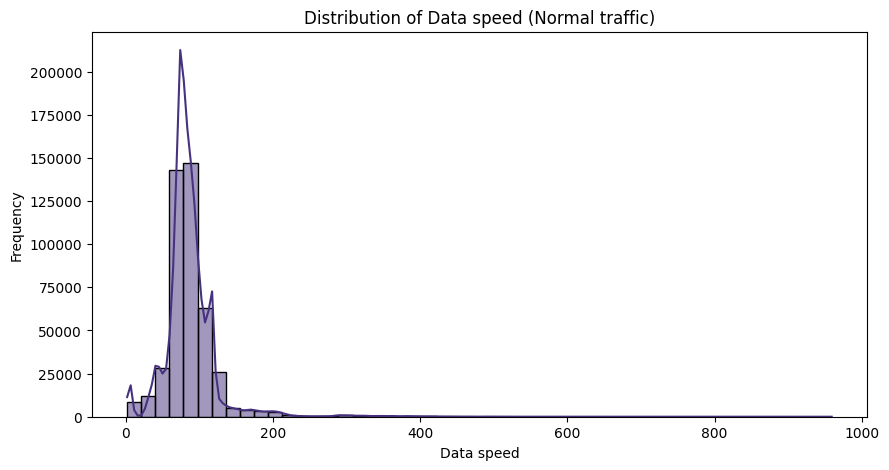

In [ ]:
plot_type_hist("Data speed", "Normal traffic")

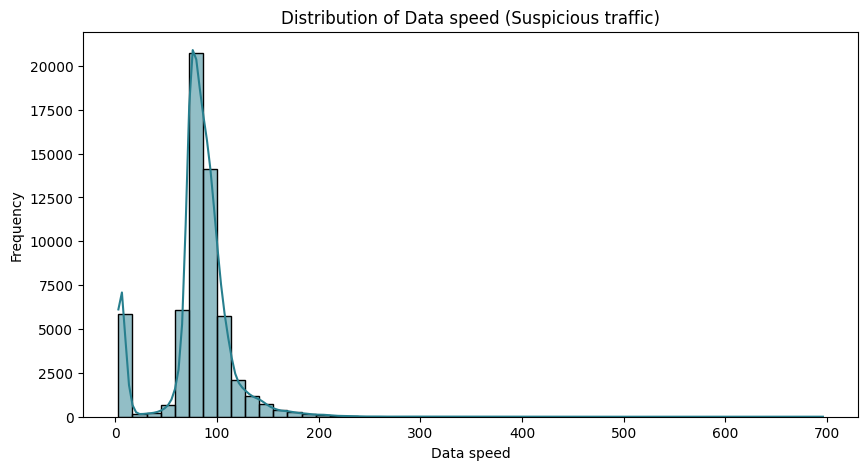

In [ ]:
plot_type_hist("Data speed", "Suspicious traffic")

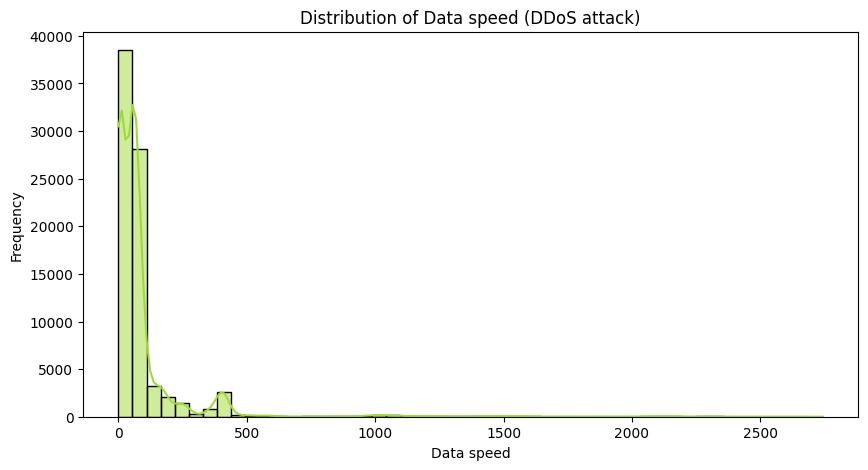

In [ ]:
plot_type_hist("Data speed", "DDoS attack")

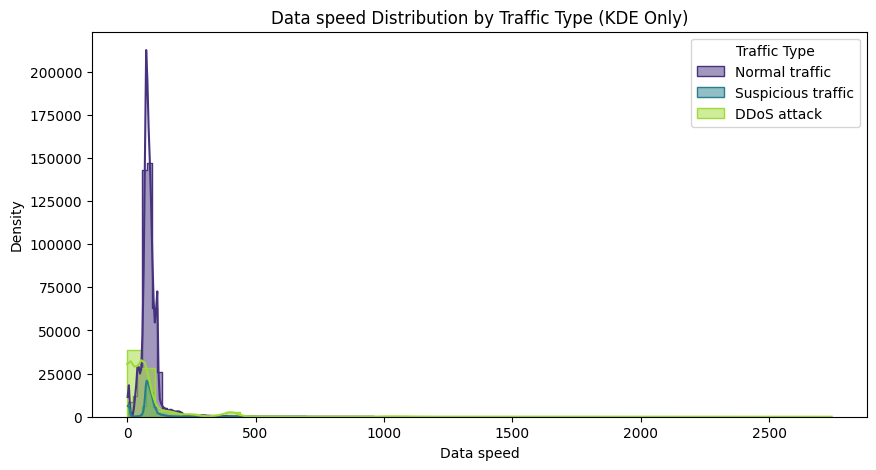

In [ ]:
plot_kde("Data speed")

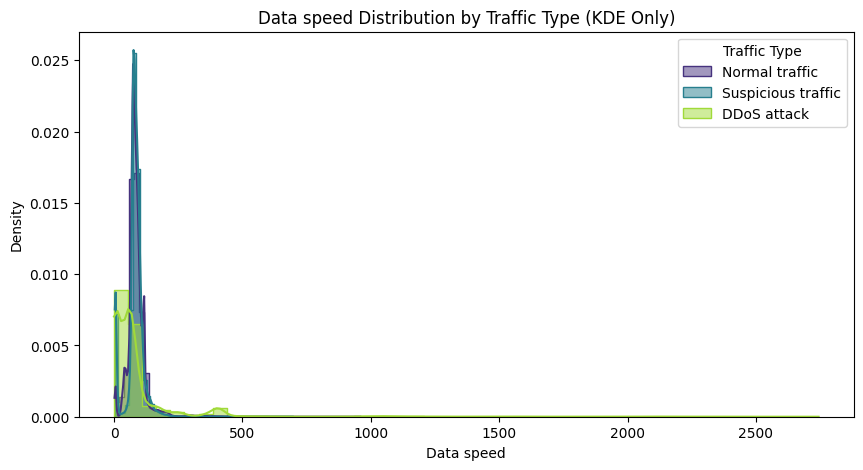

In [ ]:
plot_kde_norm("Data speed")

# Avg packet length

## Vizsgálatok

- ua

## Módszerek

- itt először használtam a normalizált hisztogramokat (stat="density"), hiszen az adatset balance miatt torzultak a görbék (így a megfigyelések is). Ez új eredményeket hozott a többi vizsgálat esetén is (Data Speed)

## Megfigyelések

- Bár az eloszlások itt is mutatnak hasonlóságot (első és utolsó szakasz), a DDoS attack talán ez esetben különül el az egyik legjobban, egy számottevően jellemzőbb és egy még karakteresebb görbével

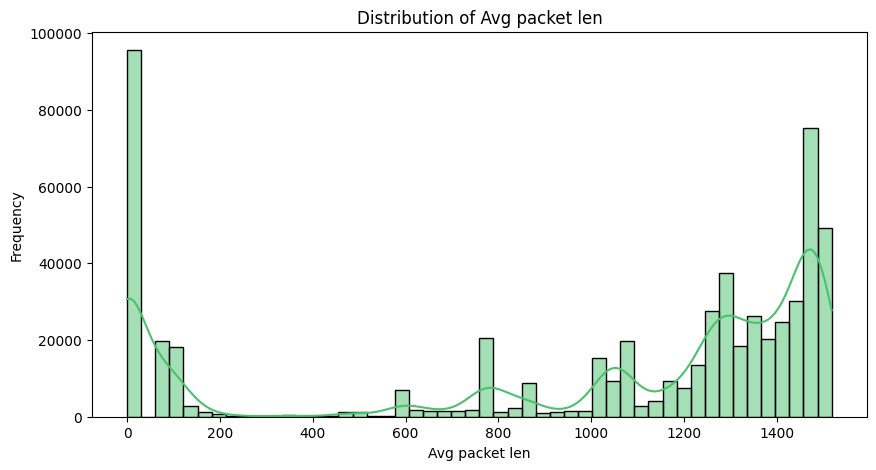

In [ ]:
plot_hist("Avg packet len")

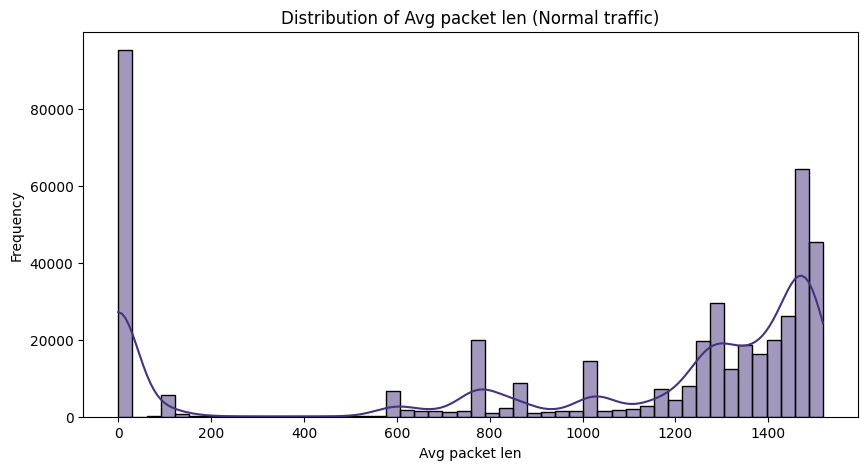

In [ ]:
plot_type_hist("Avg packet len", "Normal traffic")

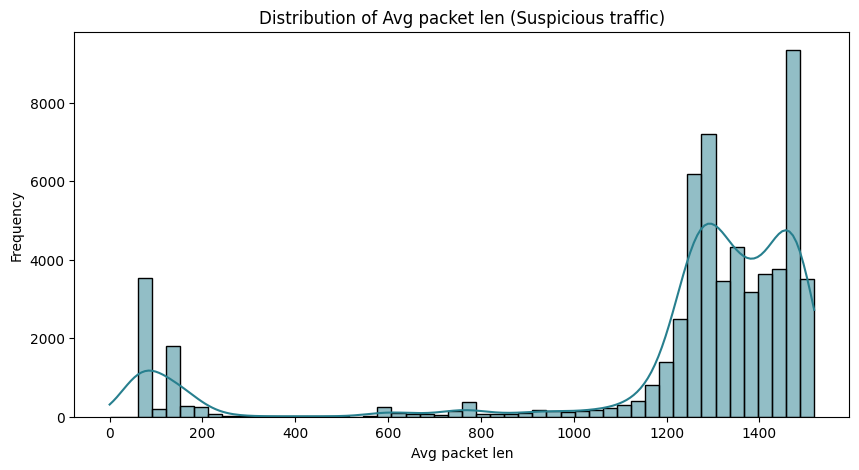

In [ ]:
plot_type_hist("Avg packet len", "Suspicious traffic")

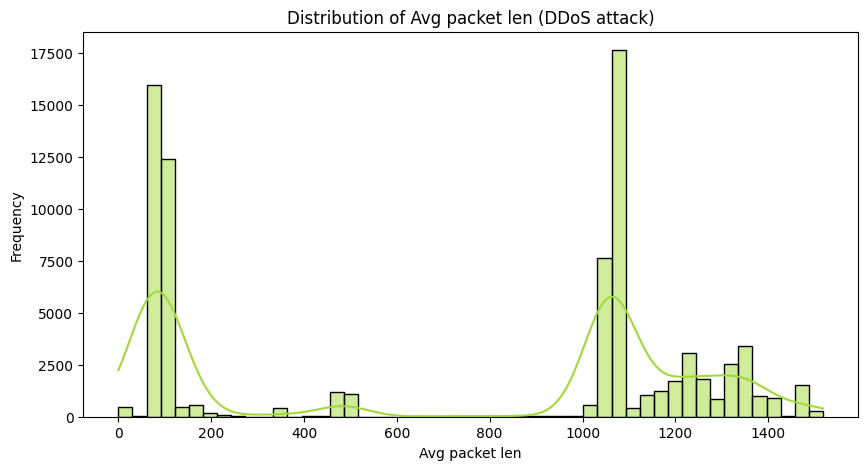

In [ ]:
plot_type_hist("Avg packet len", "DDoS attack")

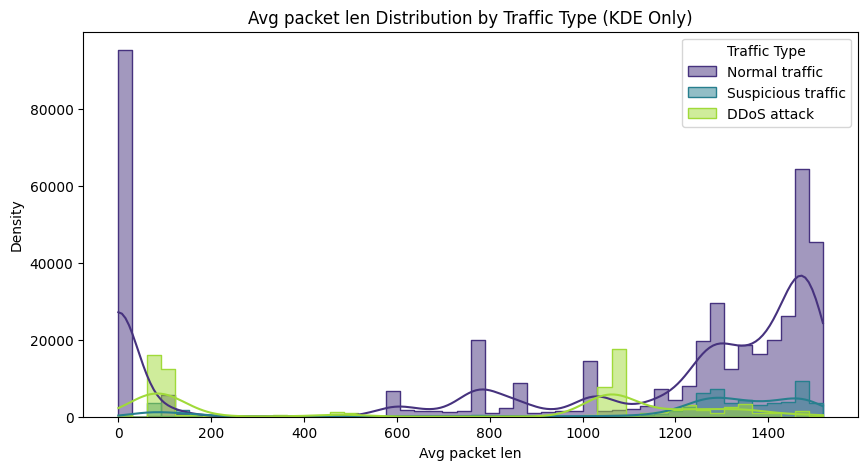

In [ ]:
plot_kde("Avg packet len")

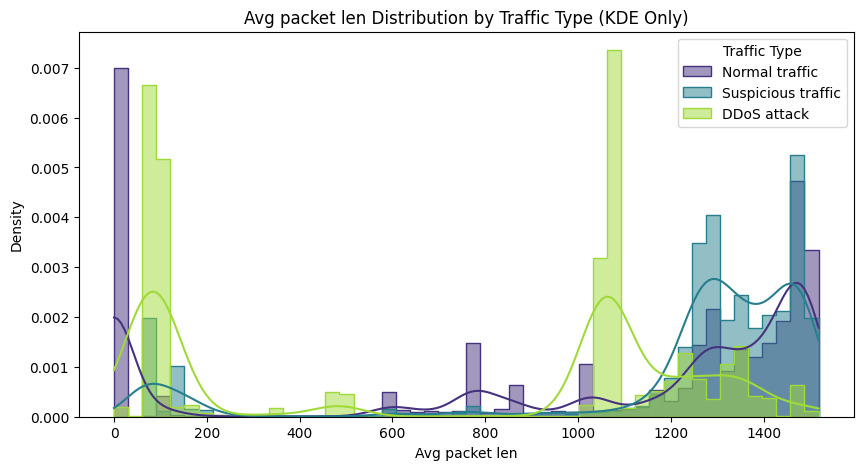

In [ ]:
plot_kde_norm("Avg packet len")

# Source IP count

## Vizsgálatok

-  ua

## Módszerek

-  ua

## Megfigyelések

-  normal és suspicious esetén nagyon kis tartományban helyezkedik el (<600, <1.000), ddos esetén 12.000-ig
-  a ddos esetén egy jellegzetes, eltérő eloszlásgörbe figyelhető meg

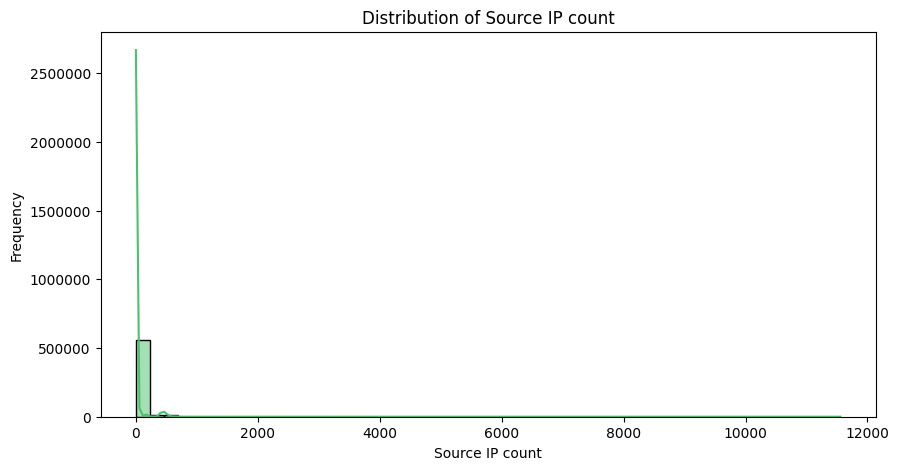

In [ ]:
plot_hist("Source IP count")

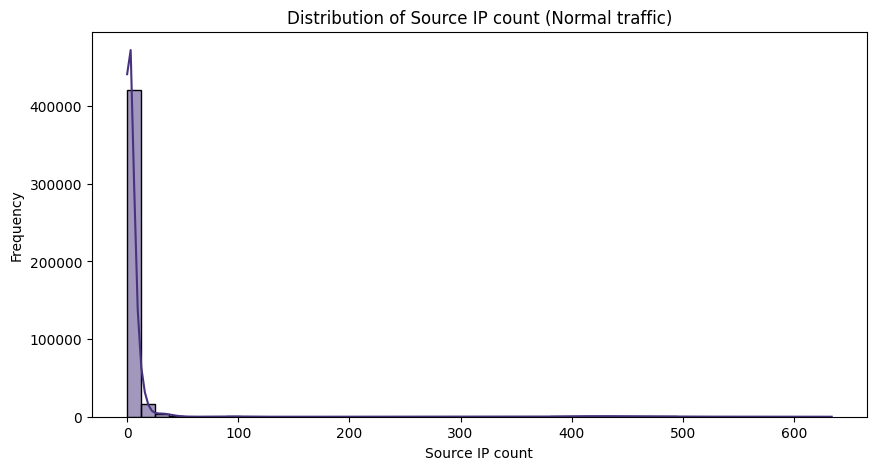

In [ ]:
plot_type_hist("Source IP count", "Normal traffic")

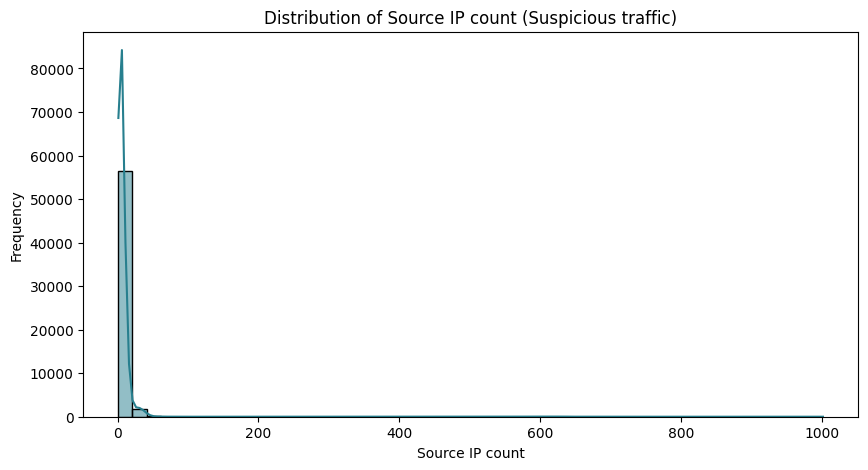

In [ ]:
plot_type_hist("Source IP count", "Suspicious traffic")

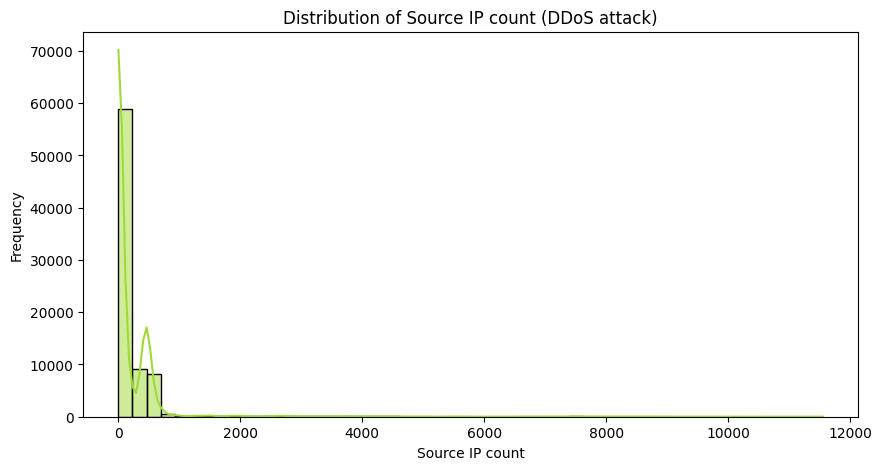

In [ ]:
plot_type_hist("Source IP count", "DDoS attack")

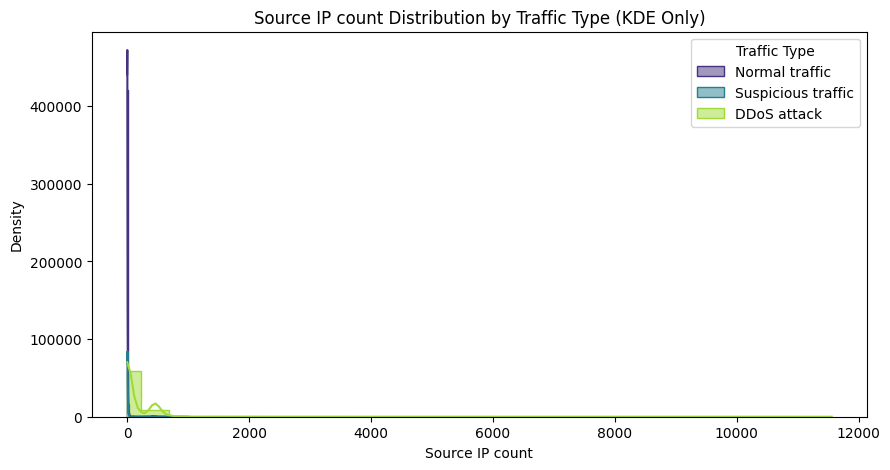

In [ ]:
plot_kde("Source IP count")

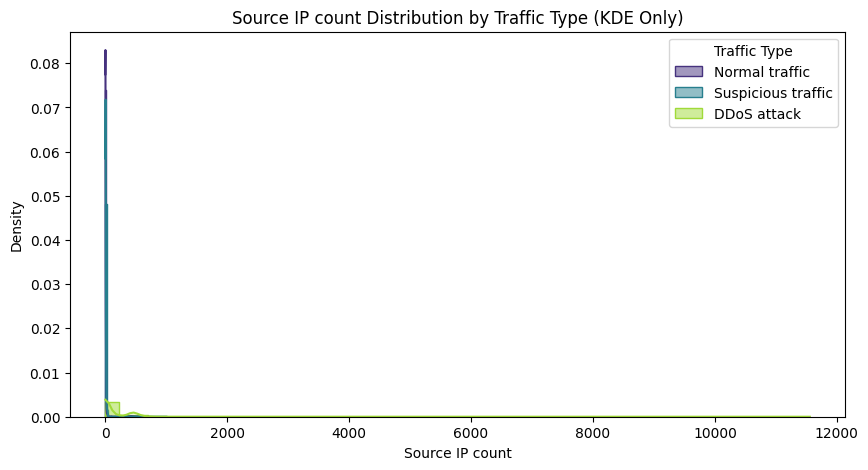

In [ ]:
plot_kde_norm("Source IP count")

# Avg source IP count

## Vizsgálatok

-  ua

## Módszerek

- ua

## Megfigyelések

-  hozzáadott értékkel nem járt ez a vizsgálat, ugyanazokat az eredményeket produkálta, mint a Source IP count.

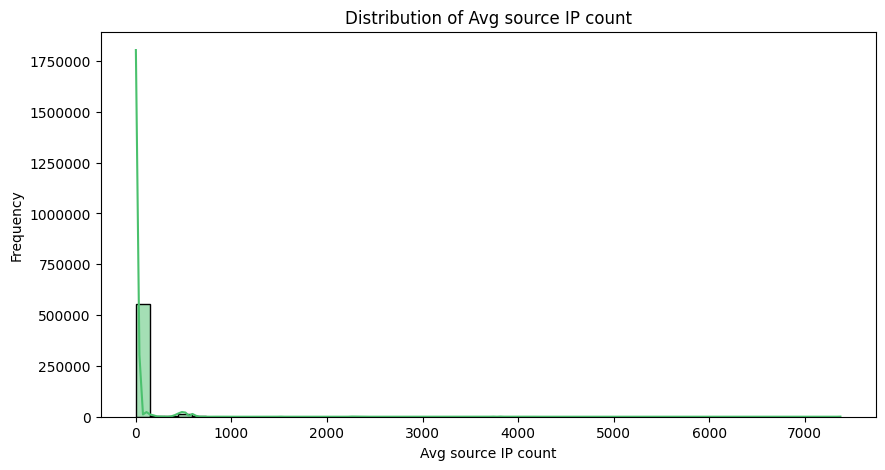

In [ ]:
plot_hist("Avg source IP count")

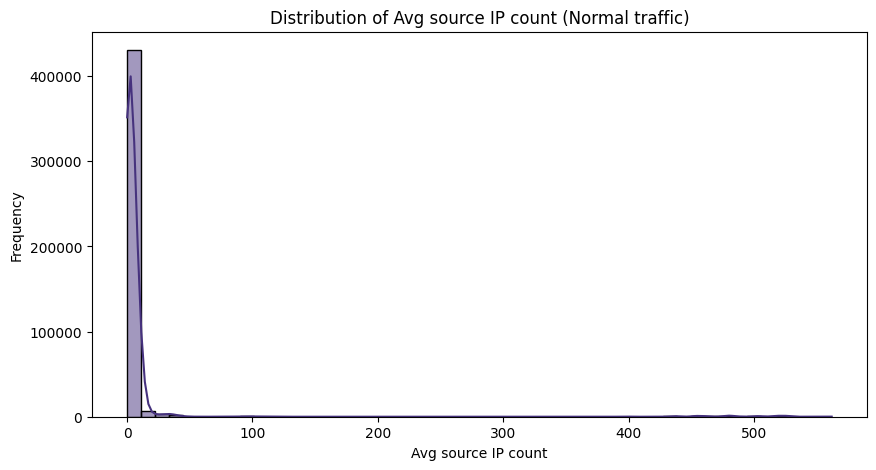

In [ ]:
plot_type_hist("Avg source IP count", "Normal traffic")

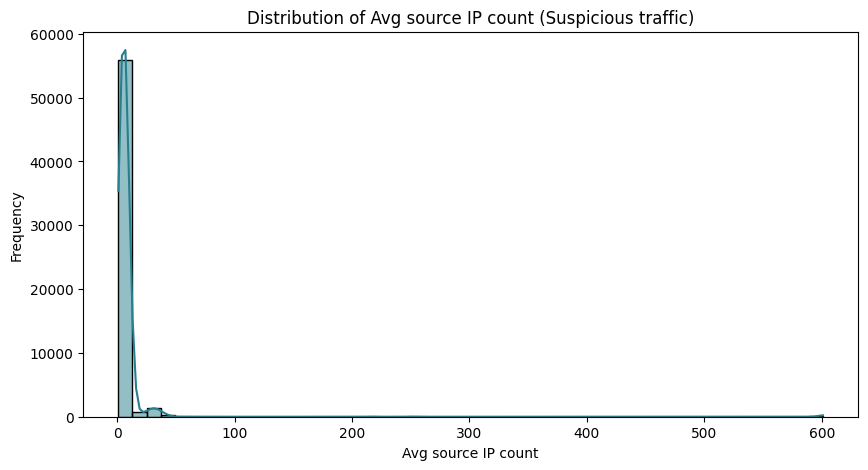

In [ ]:
plot_type_hist("Avg source IP count", "Suspicious traffic")

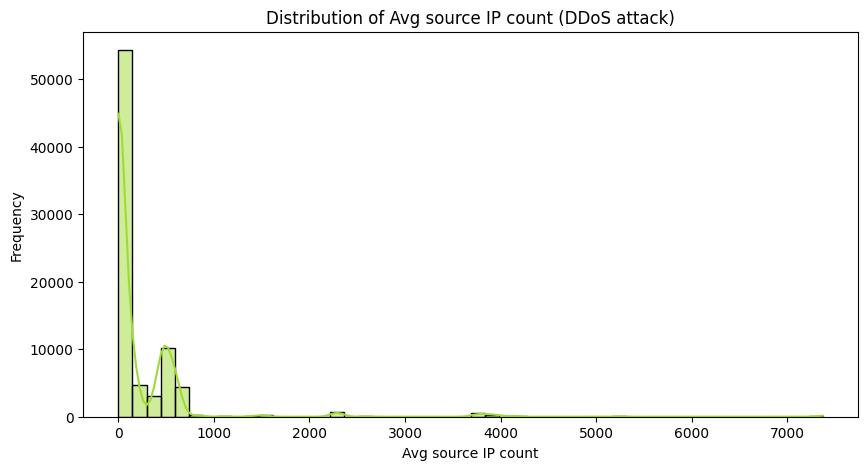

In [ ]:
plot_type_hist("Avg source IP count", "DDoS attack")

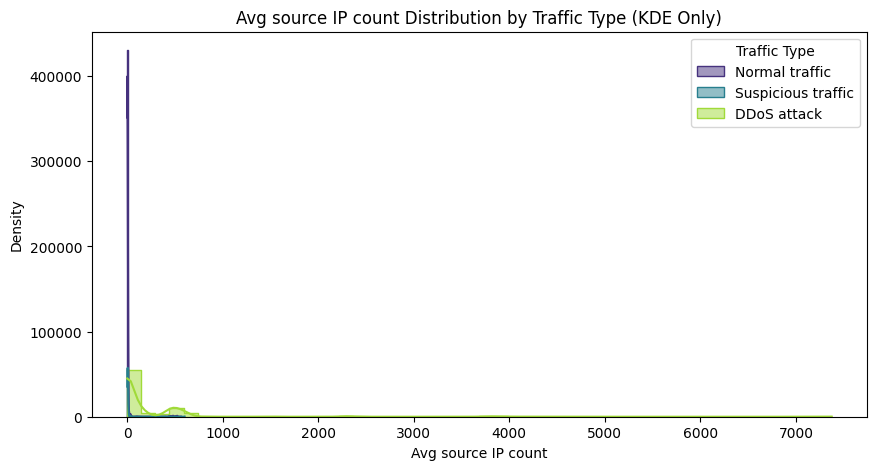

In [ ]:
plot_kde("Avg source IP count")

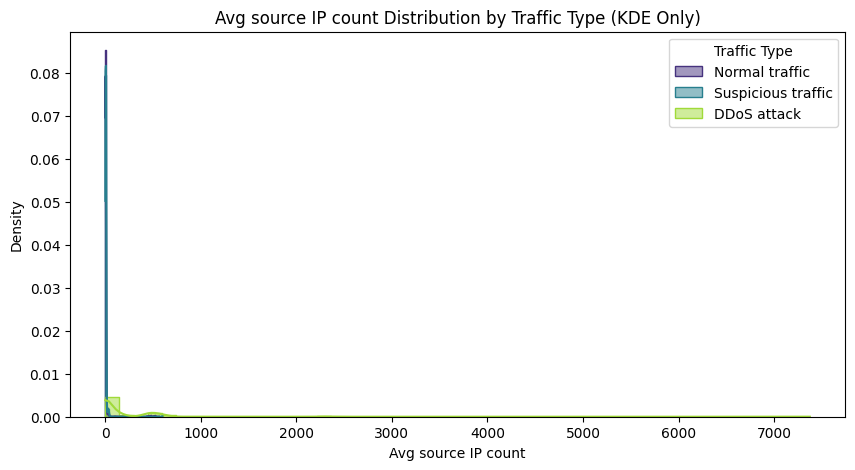

In [ ]:
plot_kde_norm("Avg source IP count")

# Port number

## Vizsgálatok

-  ua

## Módszerek

- a legjellemzőbb portokról külön magyarázatot készítettem

## Megfigyelések

-  a ddos egyértelműen két tartományban a leghangsúlyosabb, azokon kívül nem jelenik meg számottevően


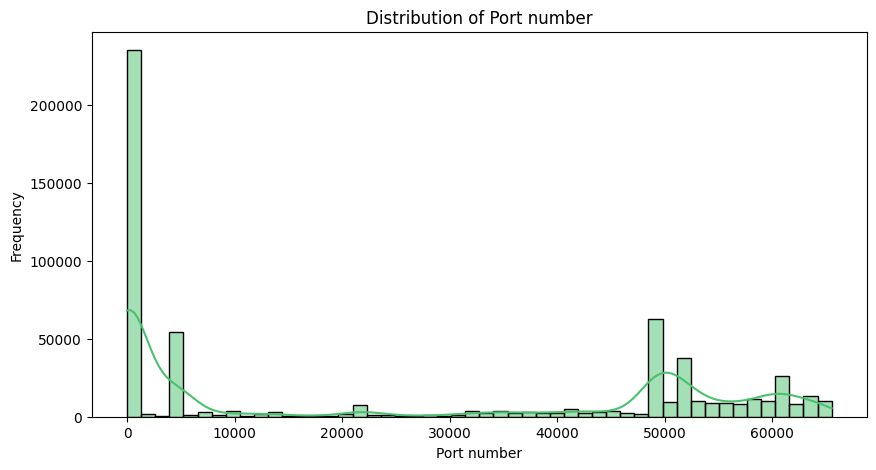

In [ ]:
plot_hist("Port number")

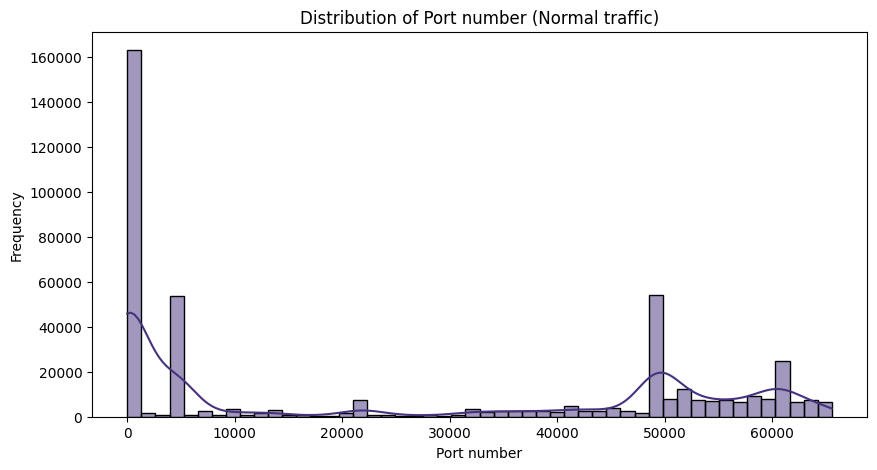

In [ ]:
plot_type_hist("Port number", "Normal traffic")

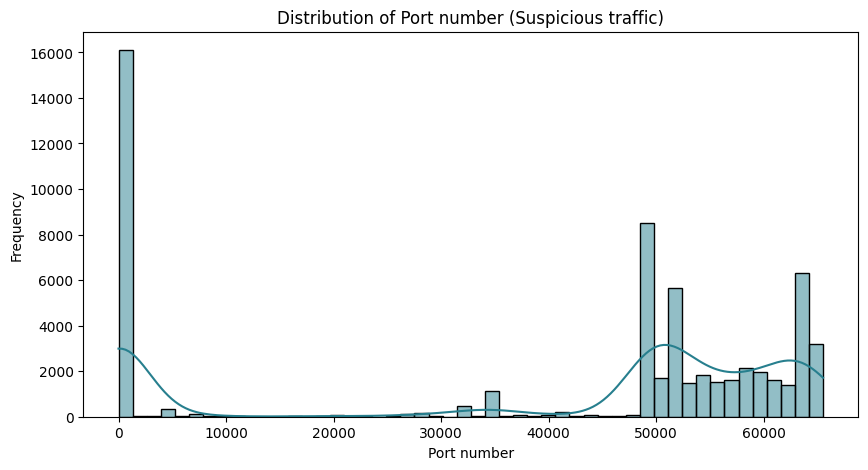

In [ ]:
plot_type_hist("Port number", "Suspicious traffic")

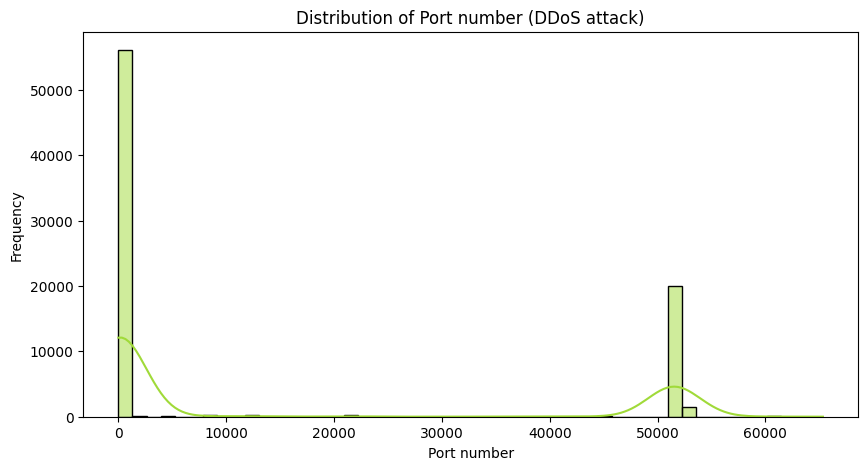

In [ ]:
plot_type_hist("Port number", "DDoS attack")

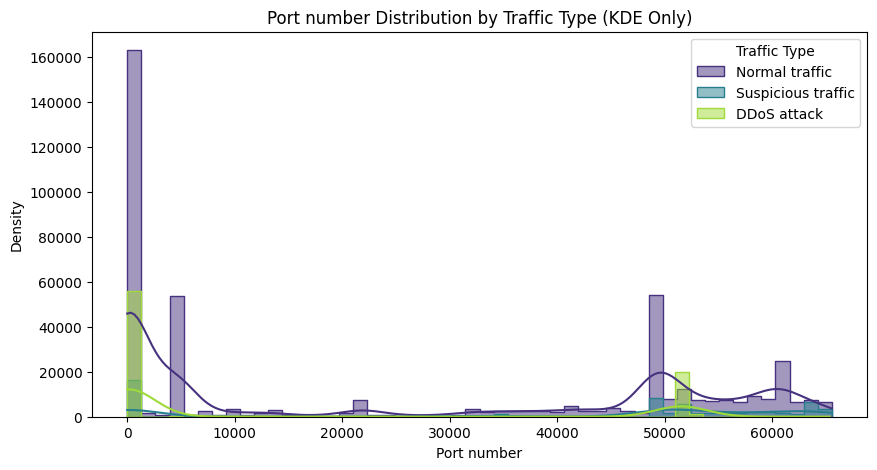

In [ ]:
plot_kde("Port number")

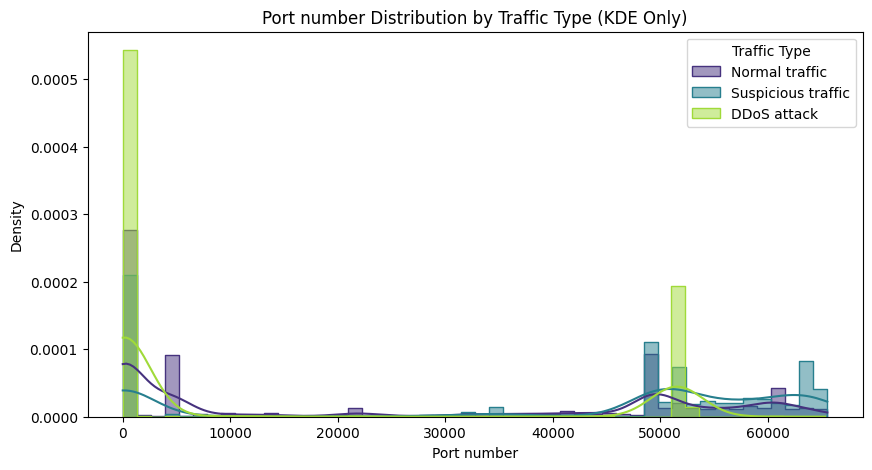

In [ ]:
plot_kde_norm("Port number")

In [ ]:
df[df["Type"] == "DDoS attack"]["Port number"].value_counts(ascending=False)

Port number
0        19553
51413    16997
443      15500
53       11784
80        4099
         ...  
33571        1
39709        1
42191        1
44929        1
61914        1
Name: count, Length: 636, dtype: int64

Portok:
- 0: OS needs to assign a port
- 51413: Transmission BitTorrent Client as the upload port
- 443: HTTPS
- 53: default port for DNS
- 80: HTTP

# Victim IP

## Vizsgálatok

-  ua

## Módszerek

- regex segítségével elkülönítettem az ID-t (int)

## Megfigyelések

-  a ddos támadásoknak három jól elkülönülő értékcsoportja van, ebből egy [a középső] karakterisztikus, csak a ddosre jellemző

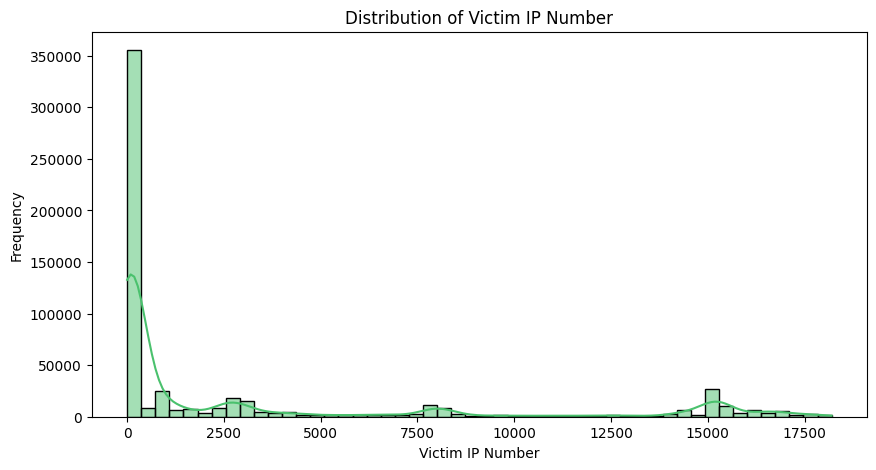

In [ ]:
plot_hist("Victim IP Number")

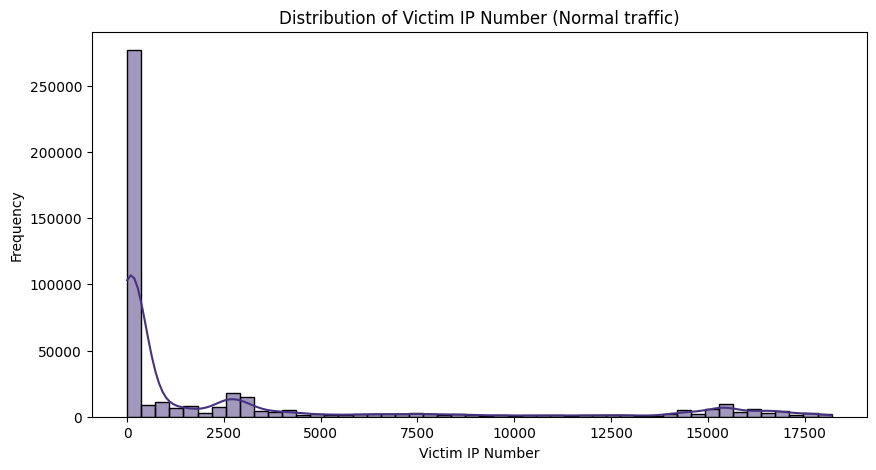

In [ ]:
plot_type_hist("Victim IP Number", "Normal traffic")

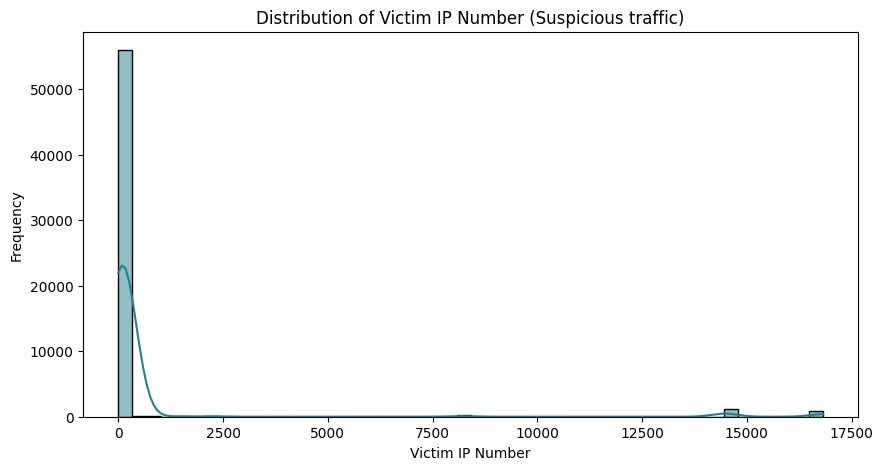

In [ ]:
plot_type_hist("Victim IP Number", "Suspicious traffic")

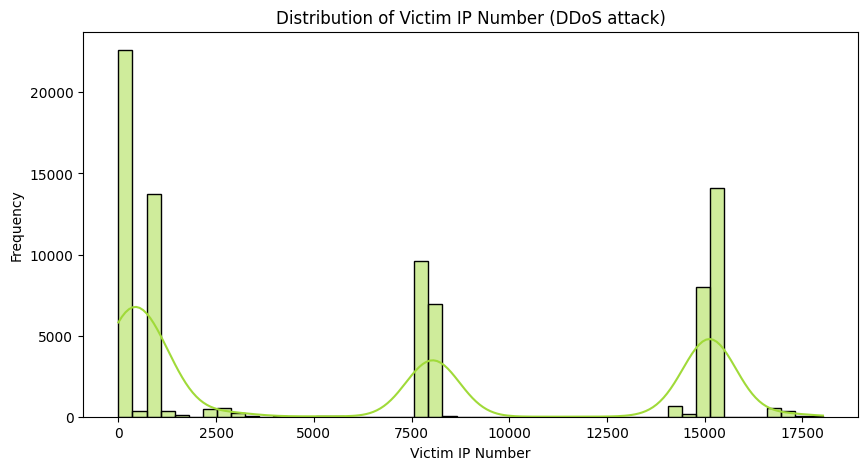

In [ ]:
plot_type_hist("Victim IP Number", "DDoS attack")

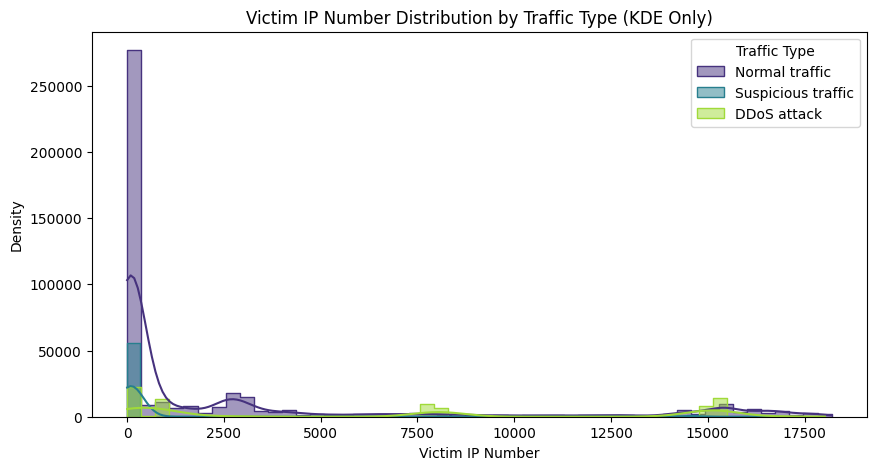

In [ ]:
plot_kde("Victim IP Number")

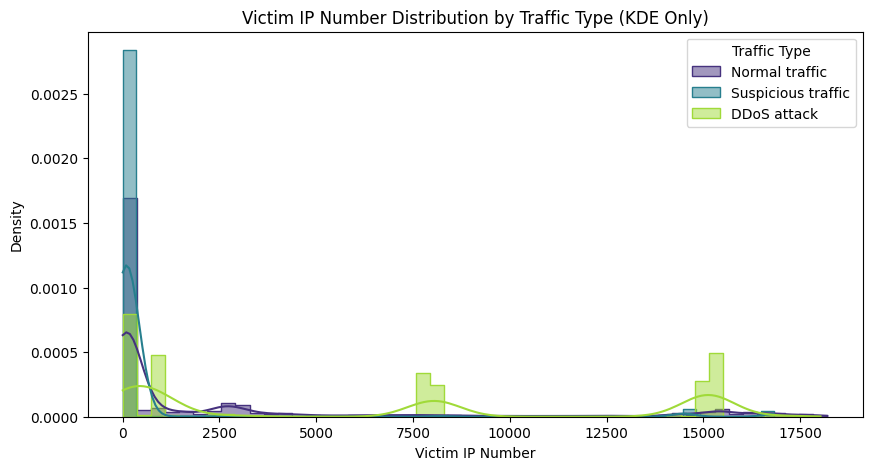

In [ ]:
plot_kde_norm("Victim IP Number")

# Start time hour

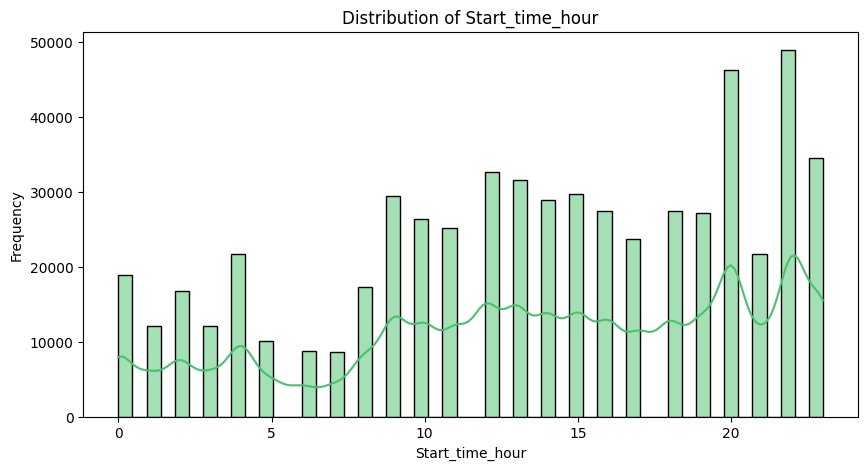

In [ ]:
plot_hist("Start_time_hour")

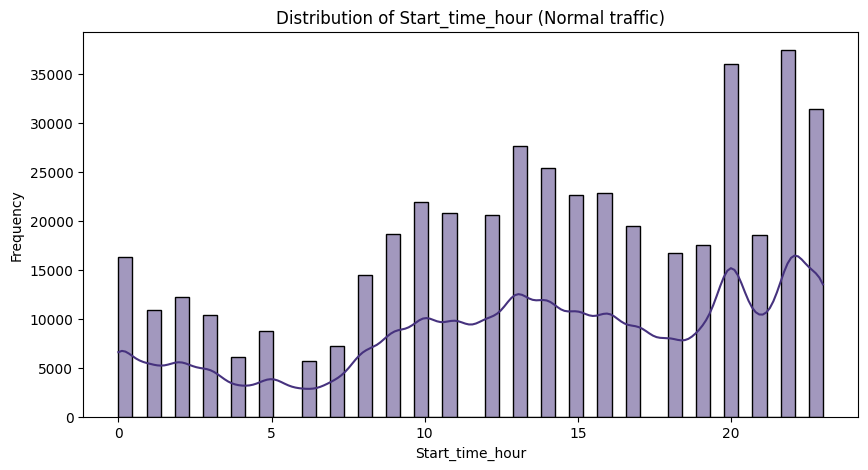

In [ ]:
plot_type_hist("Start_time_hour", "Normal traffic")

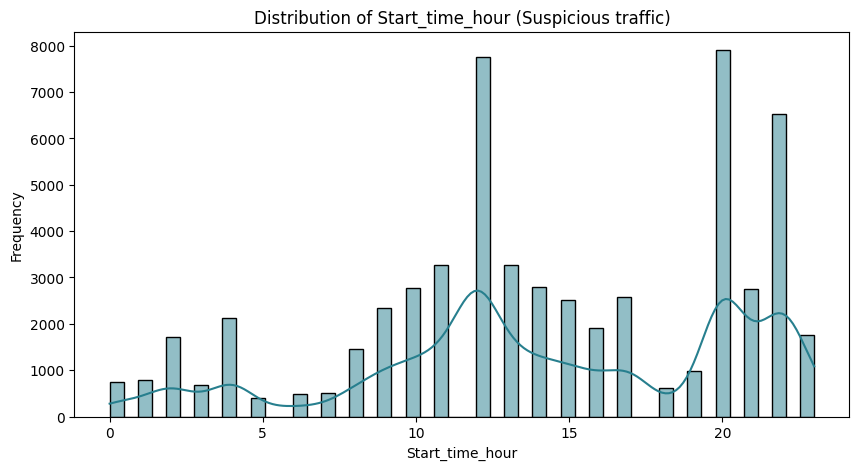

In [ ]:
plot_type_hist("Start_time_hour", "Suspicious traffic")

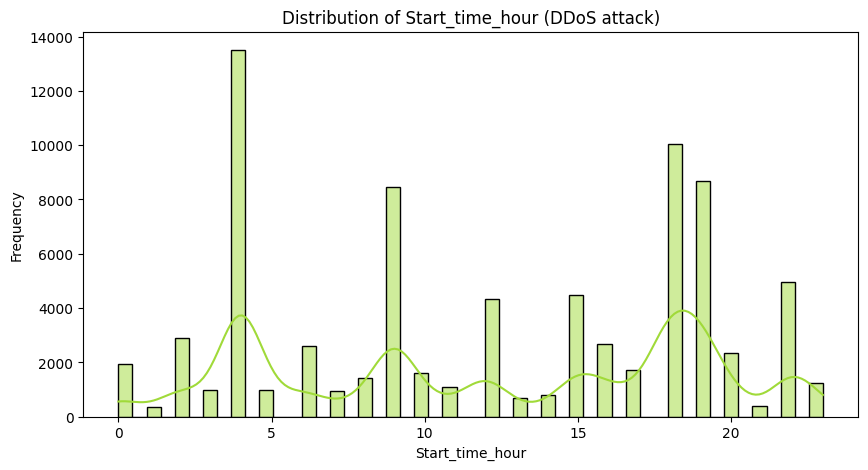

In [ ]:
plot_type_hist("Start_time_hour", "DDoS attack")

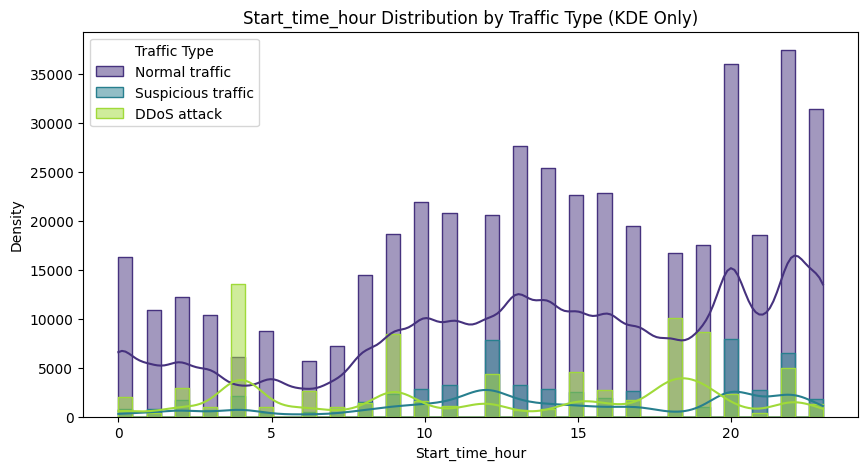

In [ ]:
plot_kde("Start_time_hour")

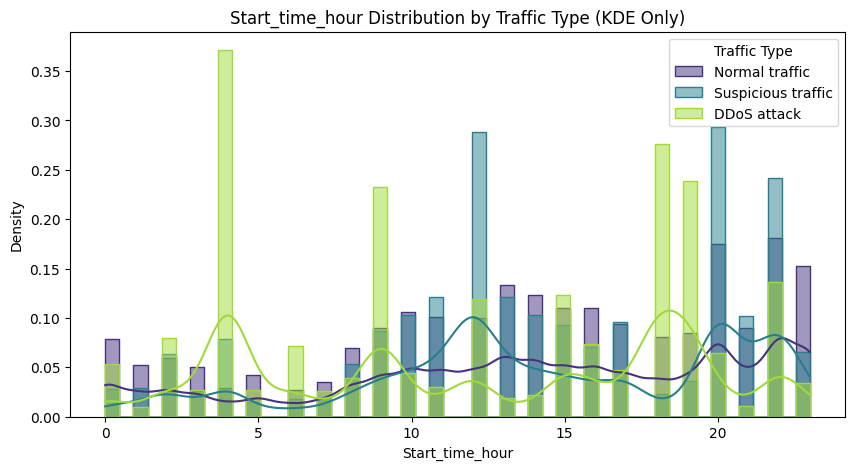

In [ ]:
plot_kde_norm("Start_time_hour")

# Start time weekday

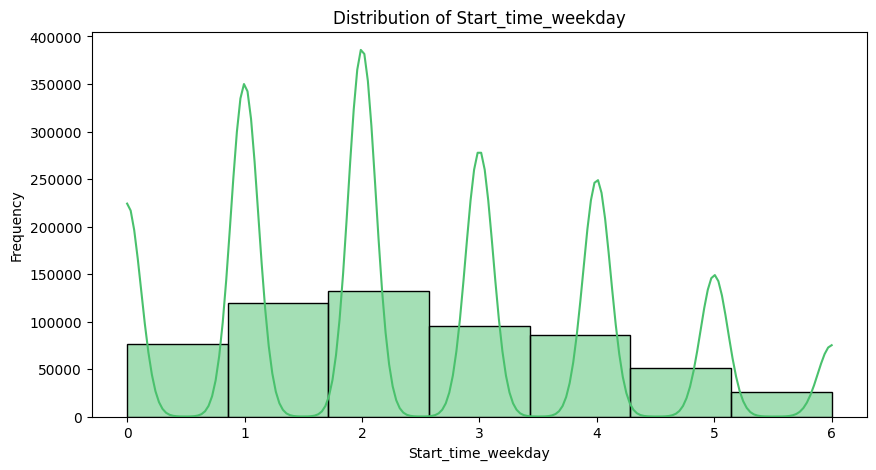

In [ ]:
plot_hist("Start_time_weekday", 7)

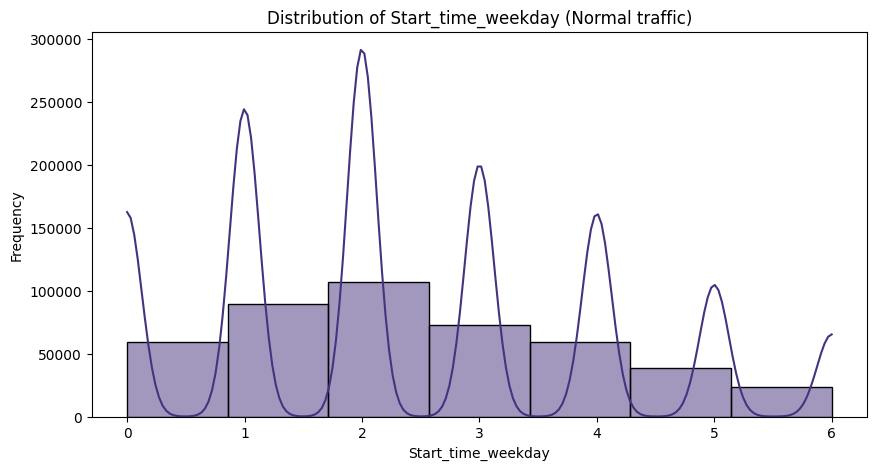

In [ ]:
plot_type_hist("Start_time_weekday", "Normal traffic", 7)

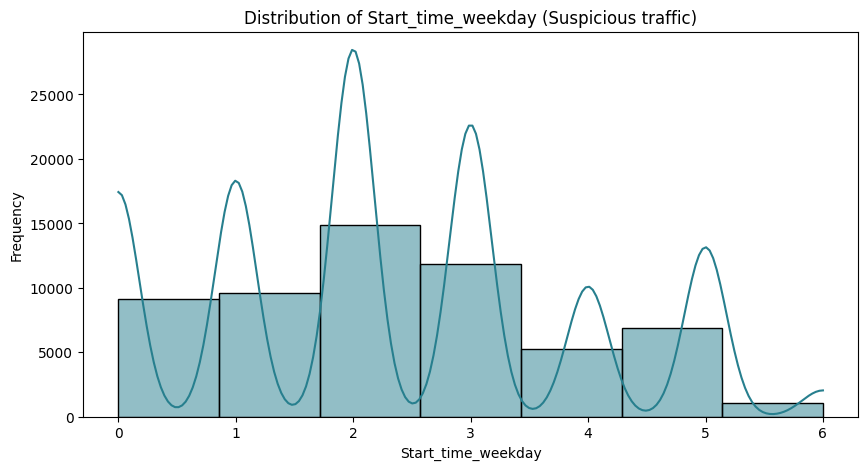

In [ ]:
plot_type_hist("Start_time_weekday", "Suspicious traffic", 7)

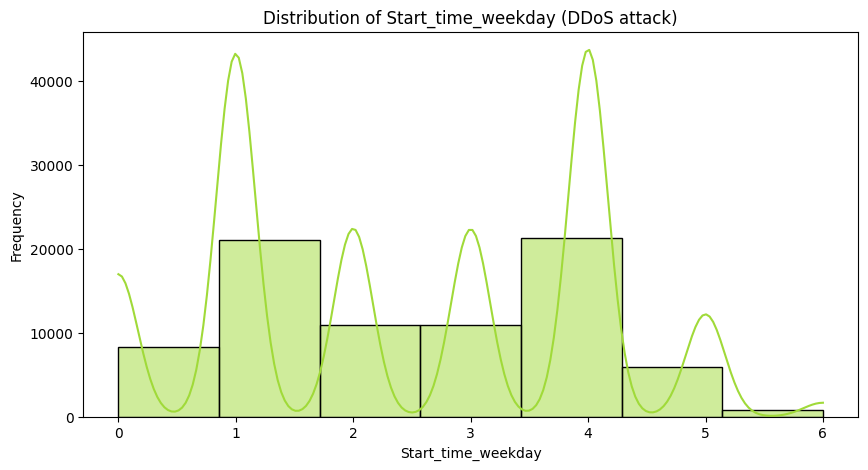

In [ ]:
plot_type_hist("Start_time_weekday", "DDoS attack", 7)

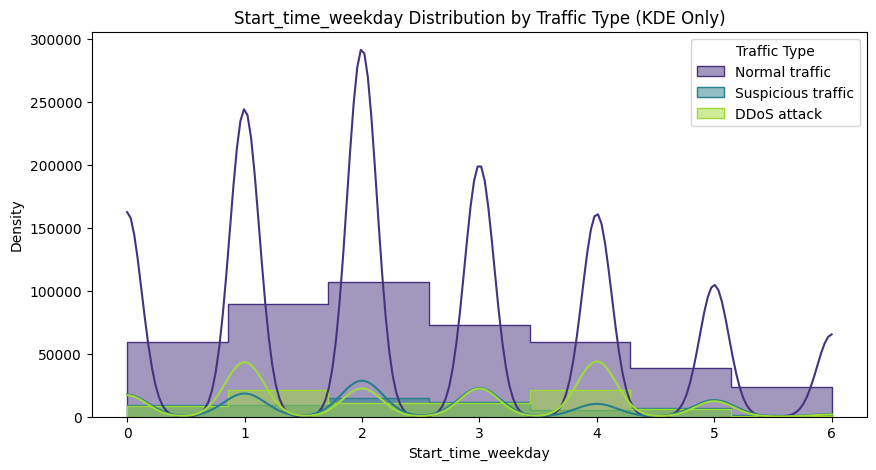

In [ ]:
plot_kde("Start_time_weekday", 7)

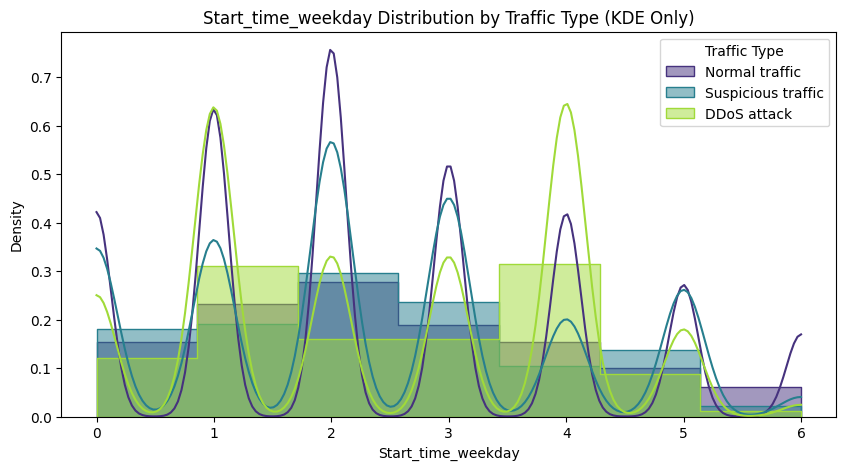

In [ ]:
plot_kde_norm("Start_time_weekday", 7)

# Start time dayofyear

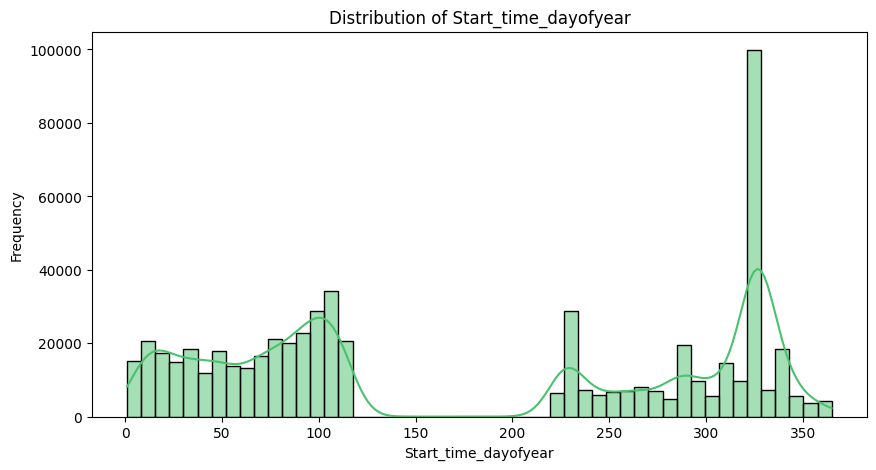

In [ ]:
plot_hist("Start_time_dayofyear")

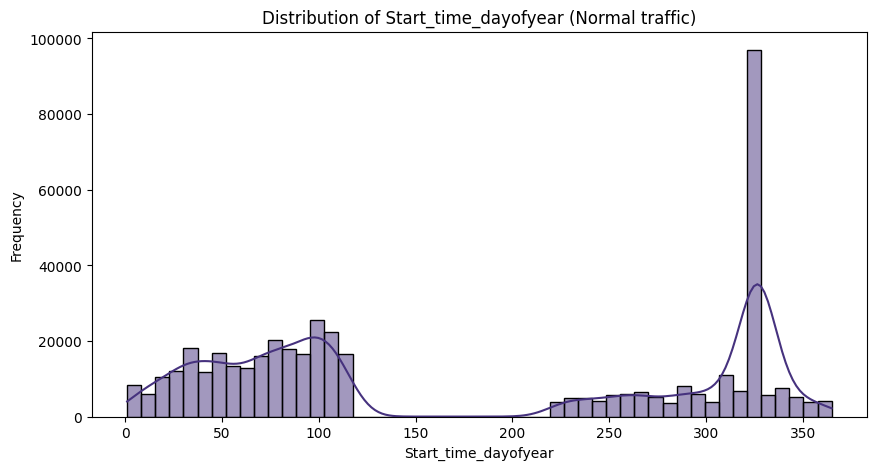

In [ ]:
plot_type_hist("Start_time_dayofyear", "Normal traffic")

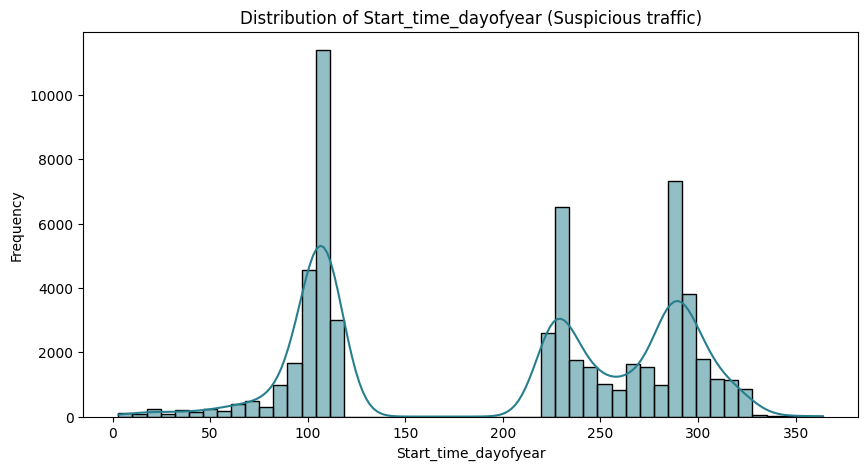

In [ ]:
plot_type_hist("Start_time_dayofyear", "Suspicious traffic")

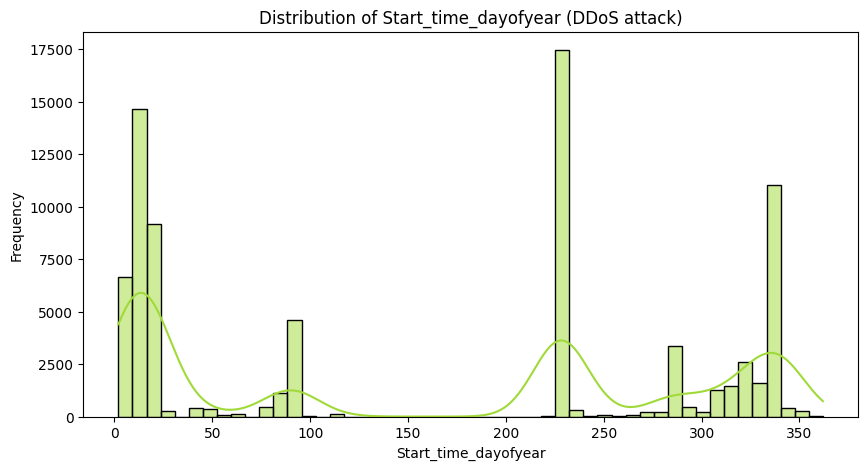

In [ ]:
plot_type_hist("Start_time_dayofyear", "DDoS attack")

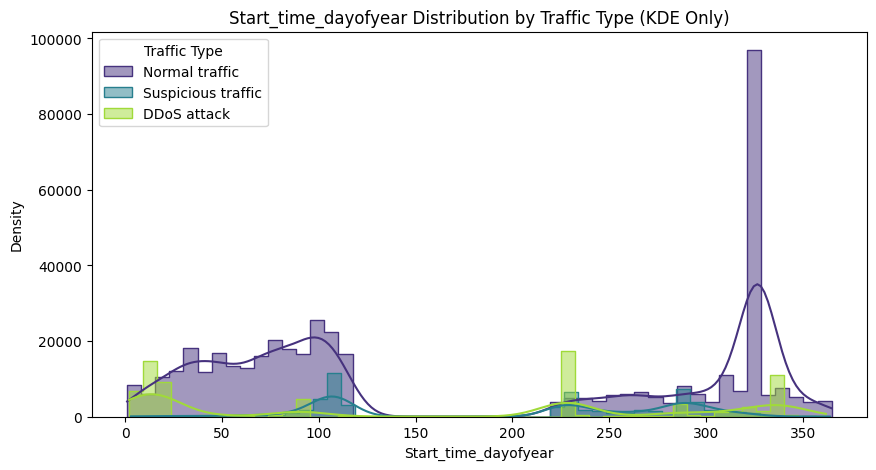

In [ ]:
plot_kde("Start_time_dayofyear")

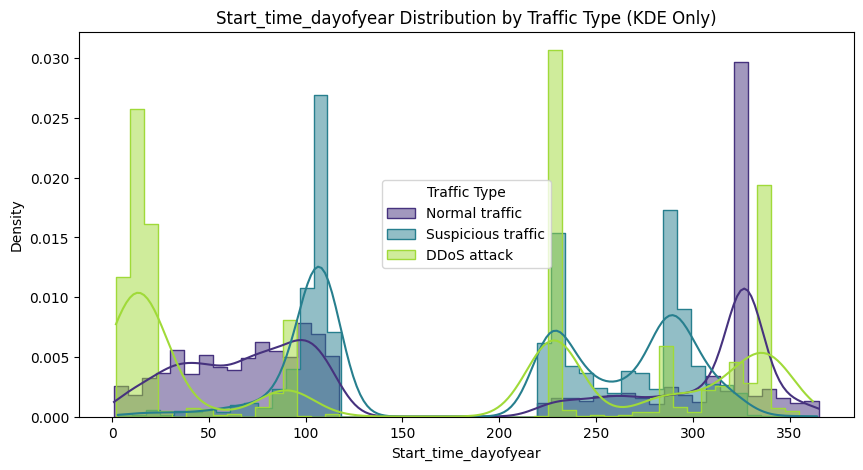

In [ ]:
plot_kde_norm("Start_time_dayofyear")

# Start time hour sin

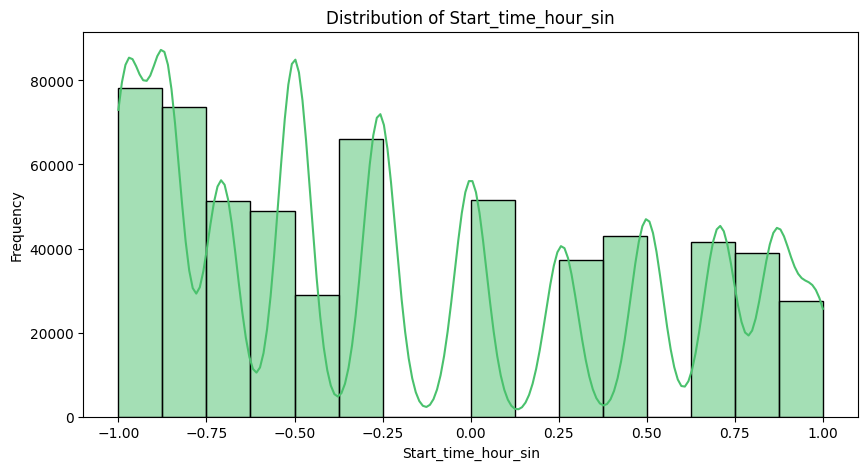

In [ ]:
plot_hist("Start_time_hour_sin", 16)

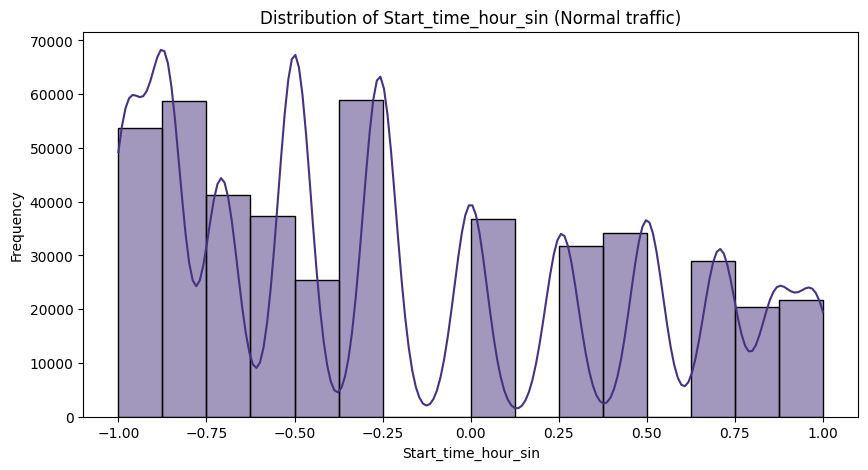

In [ ]:
plot_type_hist("Start_time_hour_sin", "Normal traffic", 16)

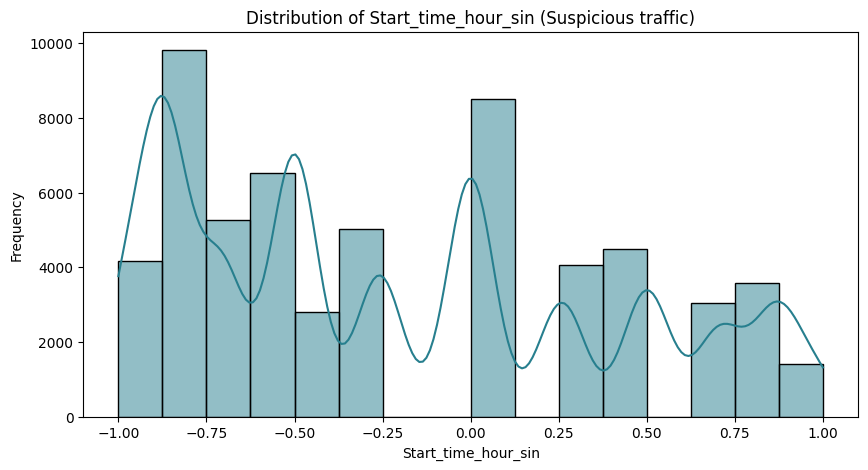

In [ ]:
plot_type_hist("Start_time_hour_sin", "Suspicious traffic", 16)

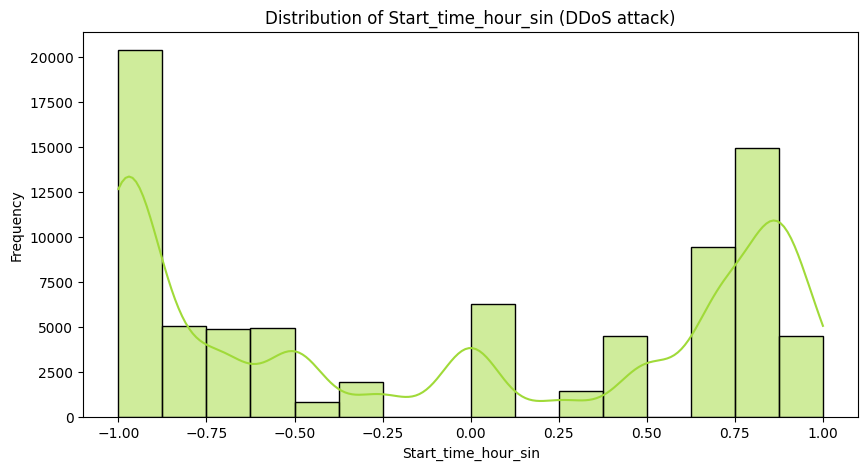

In [ ]:
plot_type_hist("Start_time_hour_sin", "DDoS attack", 16)

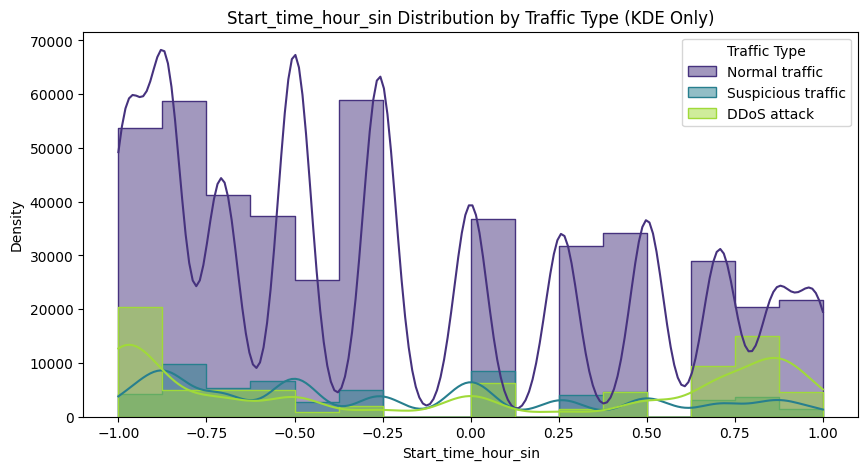

In [ ]:
plot_kde("Start_time_hour_sin", 16)

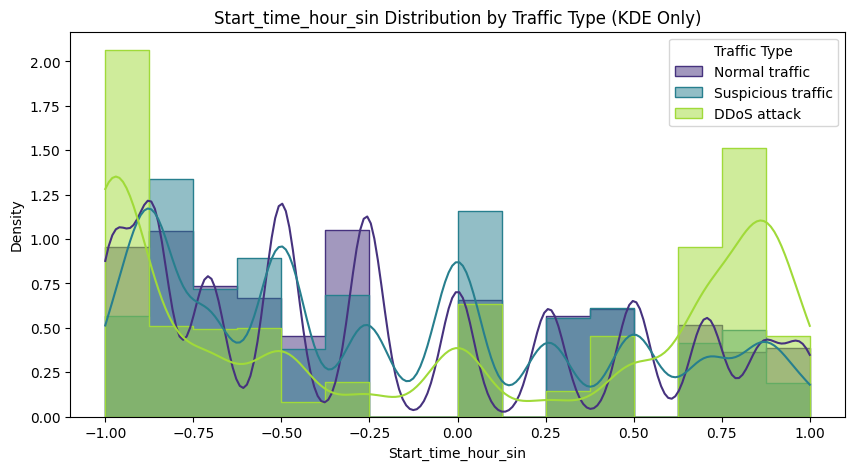

In [ ]:
plot_kde_norm("Start_time_hour_sin", 16)

# Start time hour cos

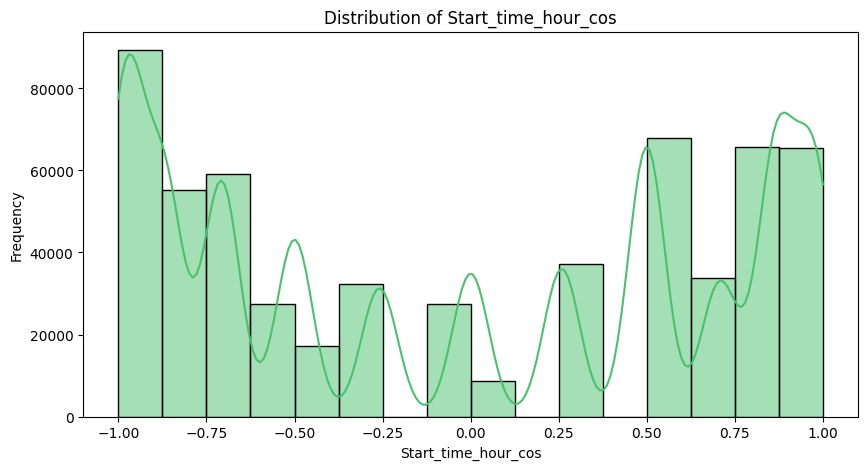

In [ ]:
plot_hist("Start_time_hour_cos", 16)

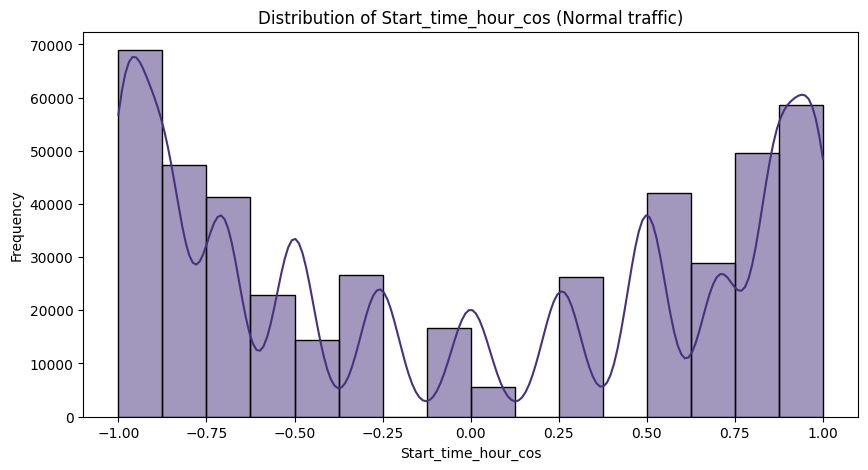

In [ ]:
plot_type_hist("Start_time_hour_cos", "Normal traffic", 16)

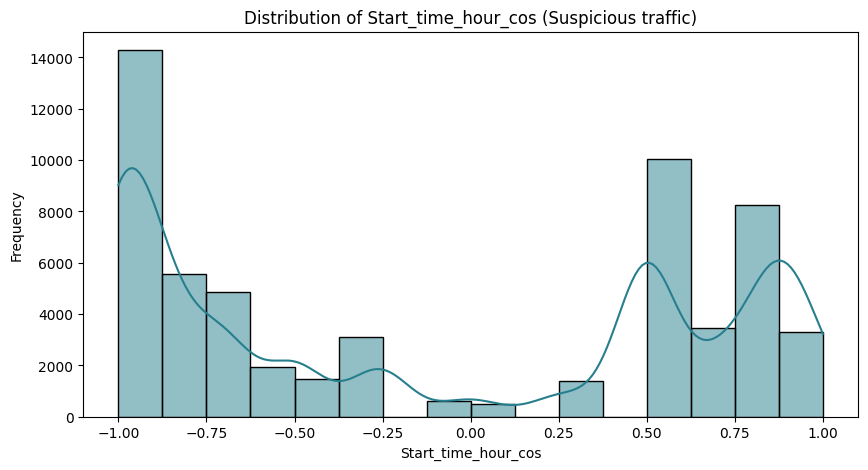

In [ ]:
plot_type_hist("Start_time_hour_cos", "Suspicious traffic", 16)

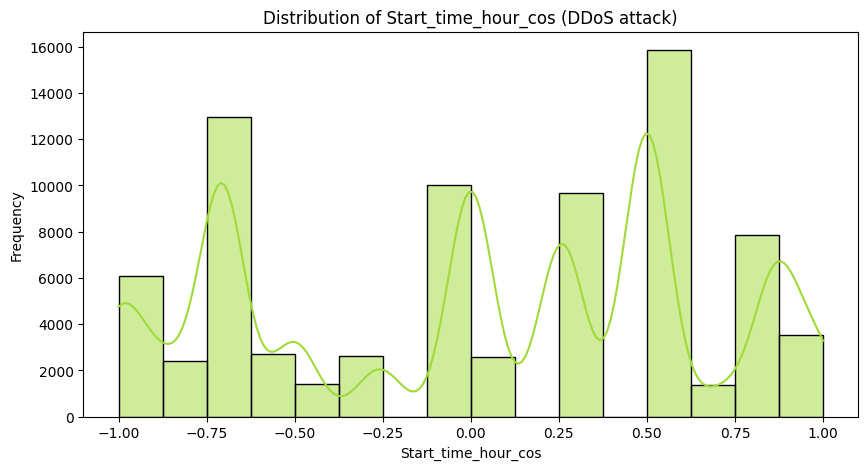

In [ ]:
plot_type_hist("Start_time_hour_cos", "DDoS attack", 16)

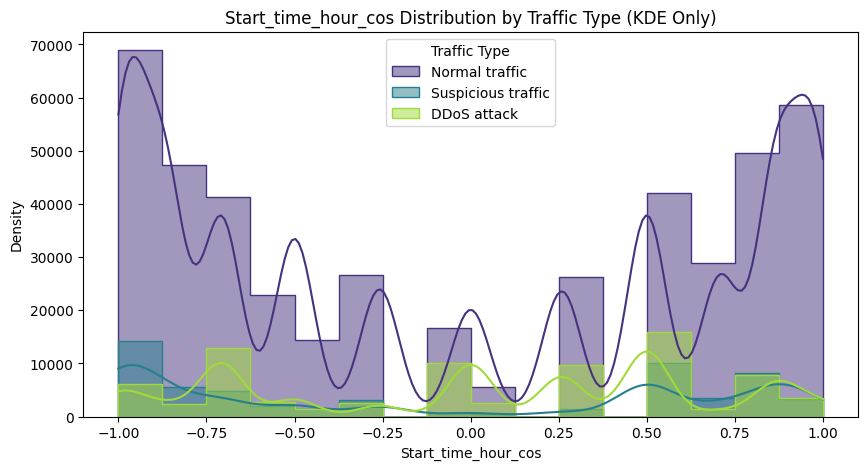

In [ ]:
plot_kde("Start_time_hour_cos", 16)

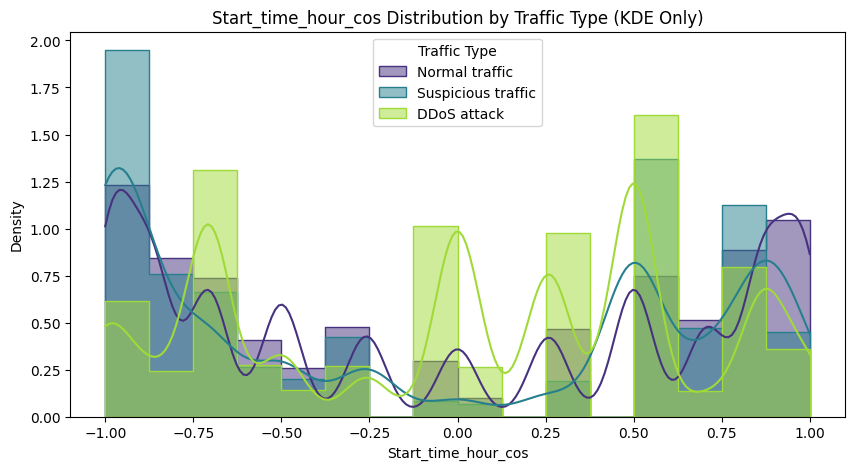

In [ ]:
plot_kde_norm("Start_time_hour_cos", 16)

# Start time weekday sin

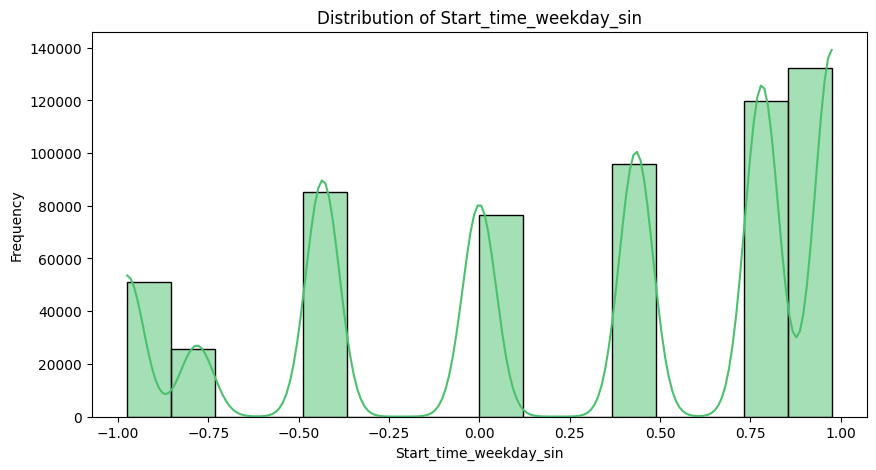

In [ ]:
plot_hist("Start_time_weekday_sin", 16)

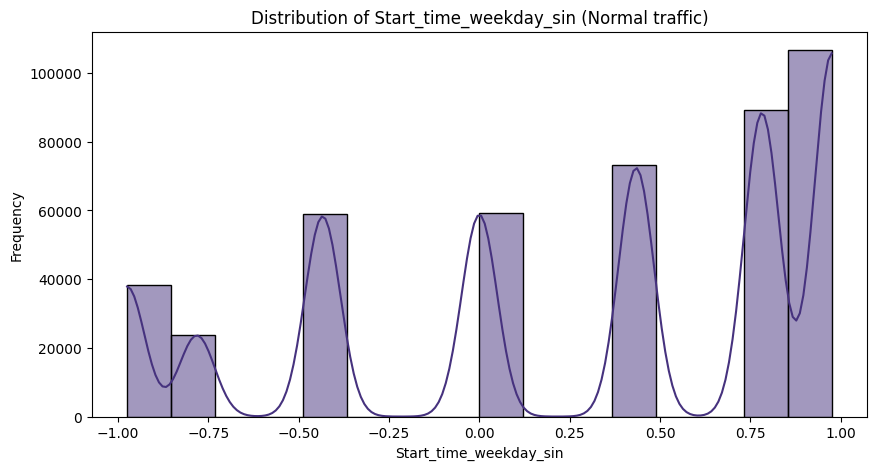

In [ ]:
plot_type_hist("Start_time_weekday_sin", "Normal traffic", 16)

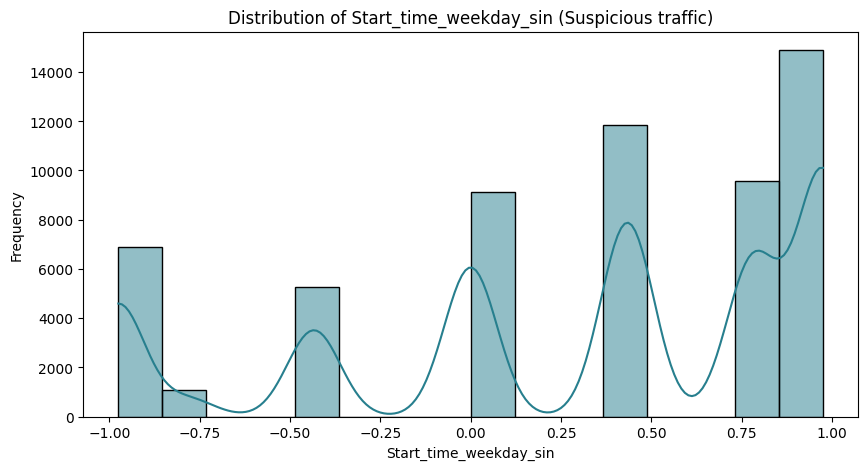

In [ ]:
plot_type_hist("Start_time_weekday_sin", "Suspicious traffic", 16)

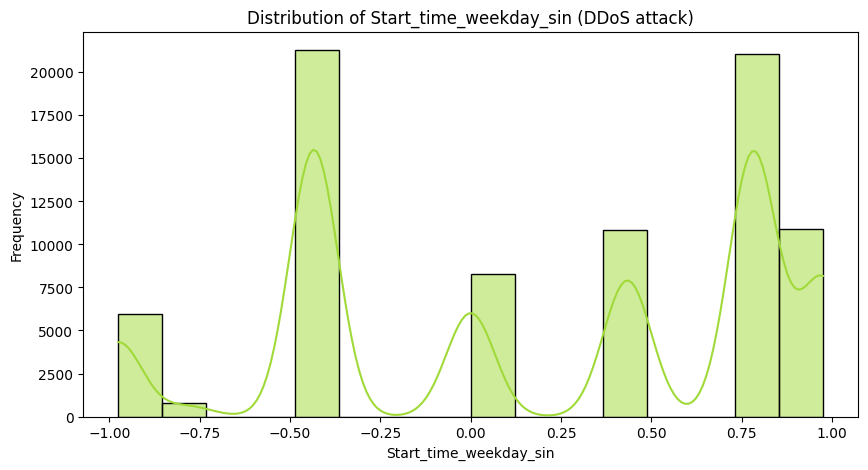

In [ ]:
plot_type_hist("Start_time_weekday_sin", "DDoS attack", 16)

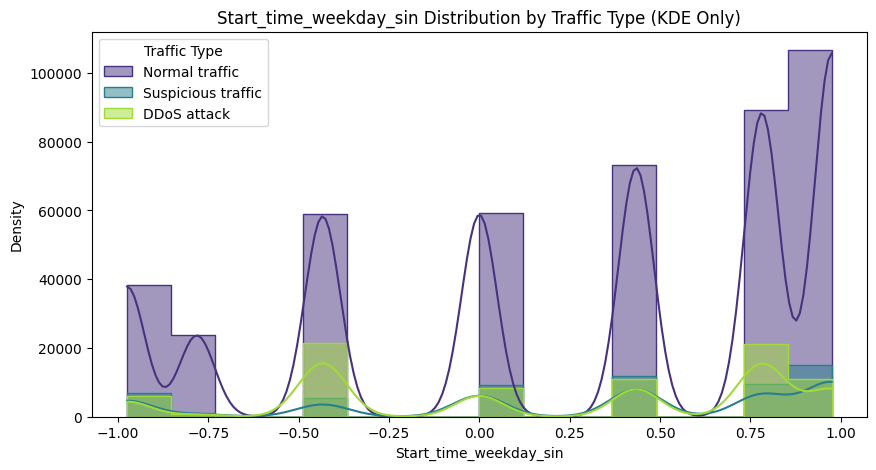

In [ ]:
plot_kde("Start_time_weekday_sin", 16)

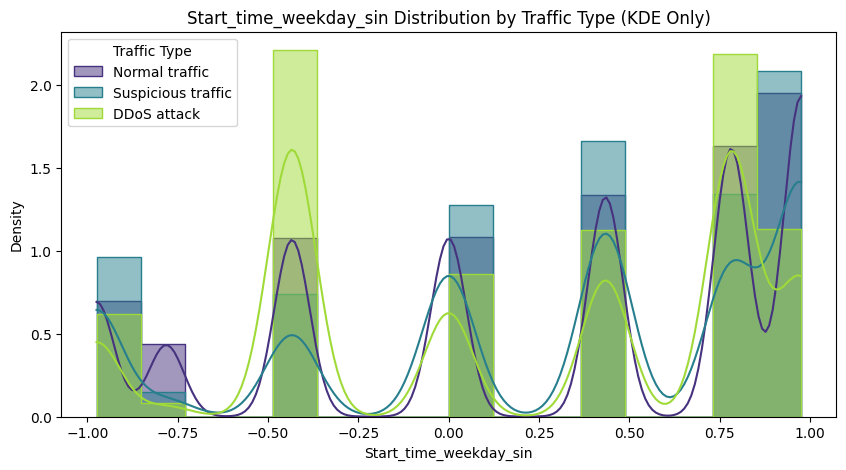

In [ ]:
plot_kde_norm("Start_time_weekday_sin", 16)

# Start time weekday cos

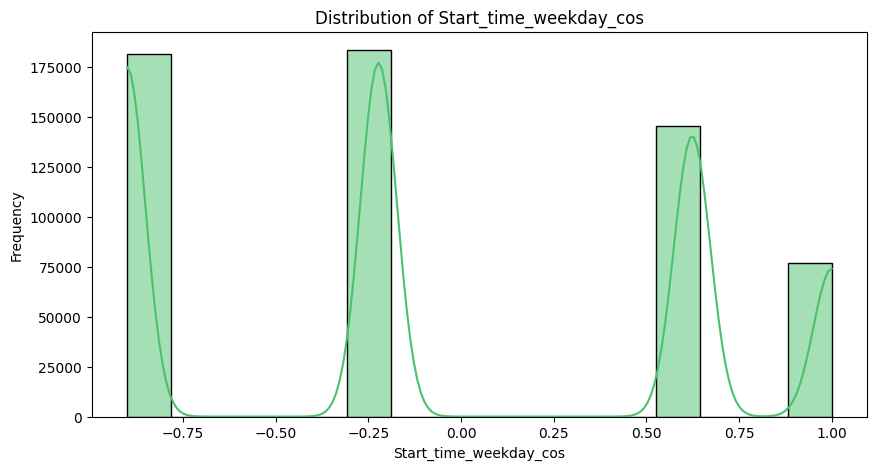

In [ ]:
plot_hist("Start_time_weekday_cos", 16)

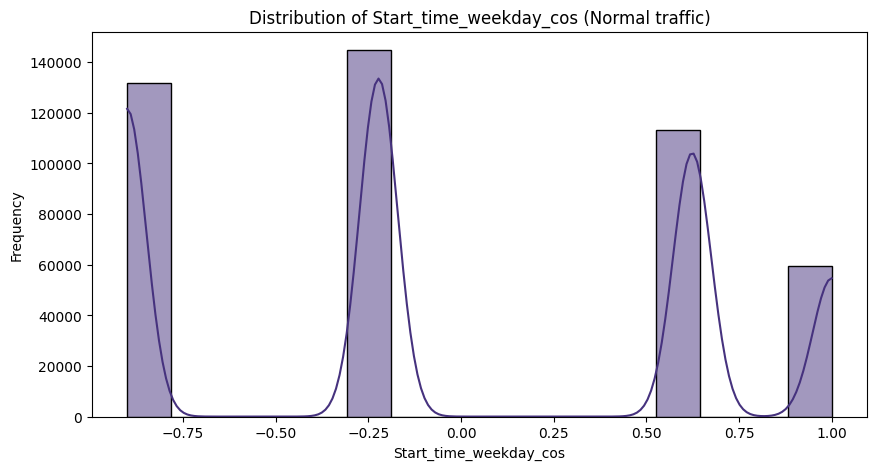

In [ ]:
plot_type_hist("Start_time_weekday_cos", "Normal traffic", 16)

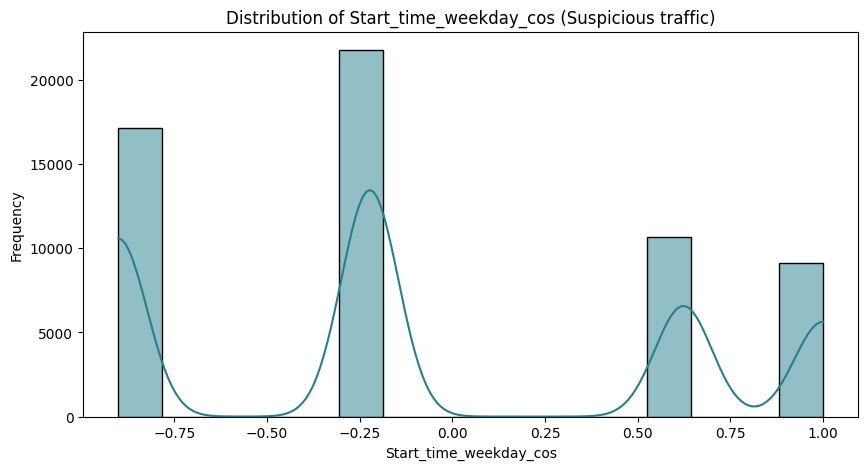

In [ ]:
plot_type_hist("Start_time_weekday_cos", "Suspicious traffic", 16)

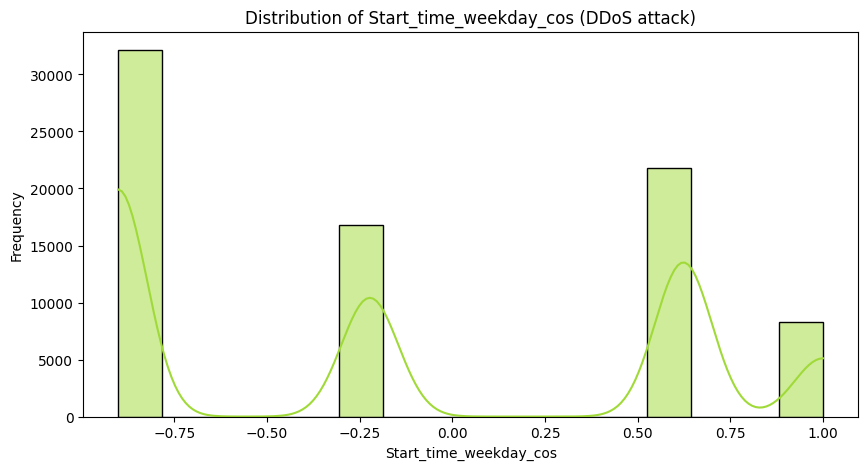

In [ ]:
plot_type_hist("Start_time_weekday_cos", "DDoS attack", 16)

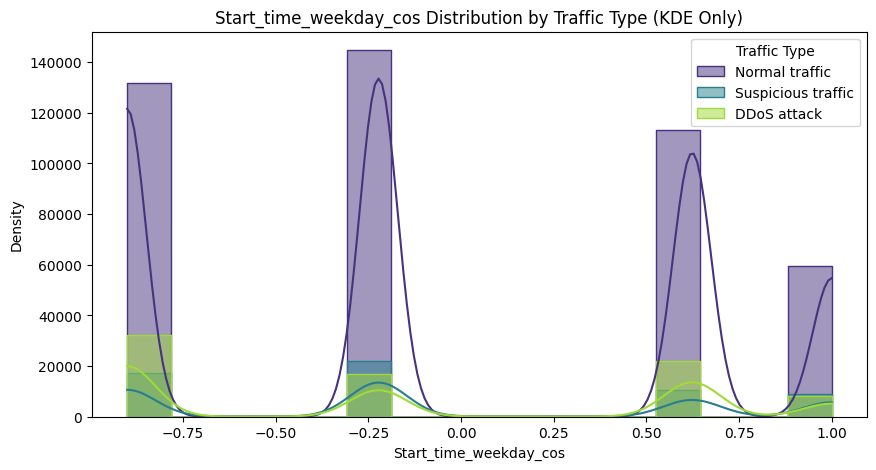

In [ ]:
plot_kde("Start_time_weekday_cos", 16)

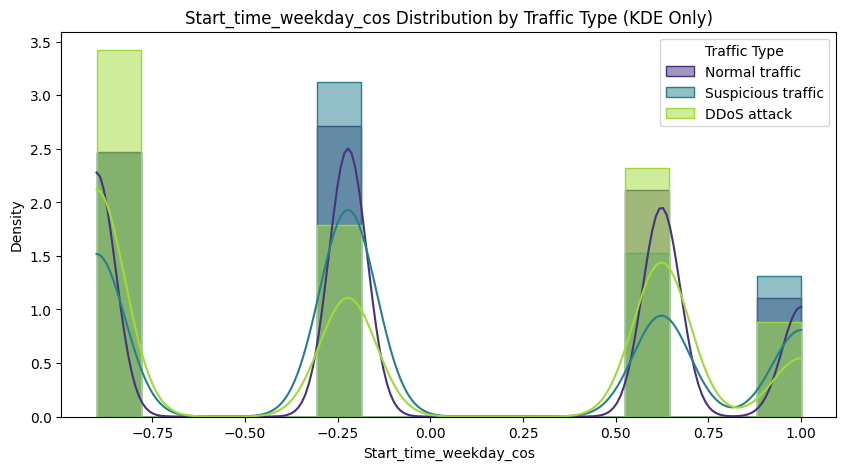

In [ ]:
plot_kde_norm("Start_time_weekday_cos", 16)

# Start time dayofyear sin

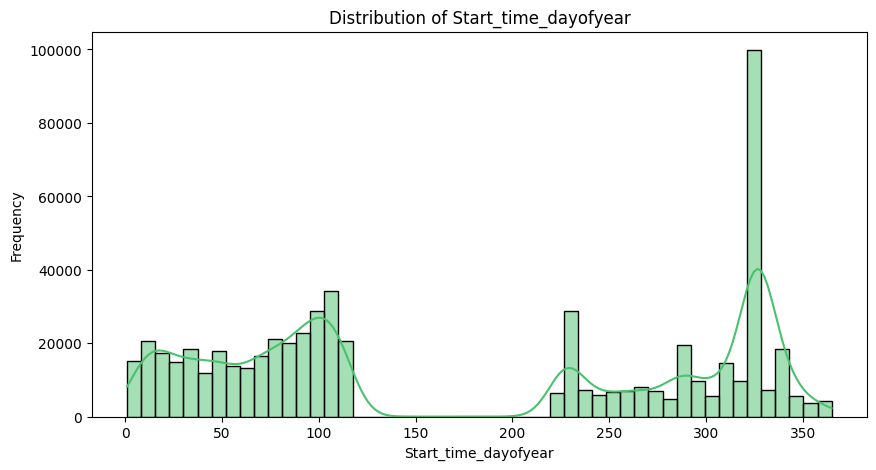

In [ ]:
plot_hist("Start_time_dayofyear")

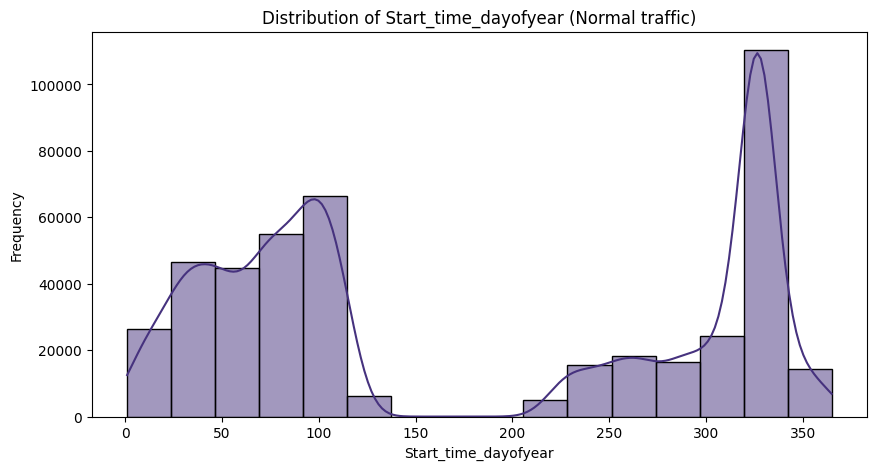

In [ ]:
plot_type_hist("Start_time_dayofyear", "Normal traffic", 16)

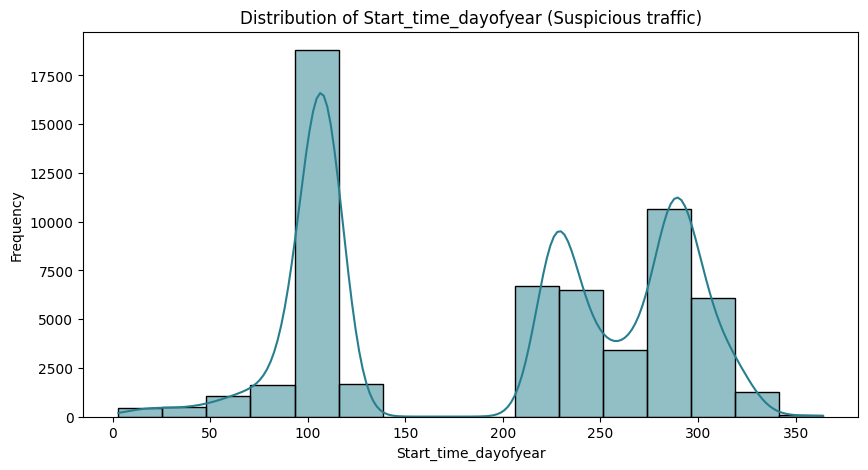

In [ ]:
plot_type_hist("Start_time_dayofyear", "Suspicious traffic", 16)

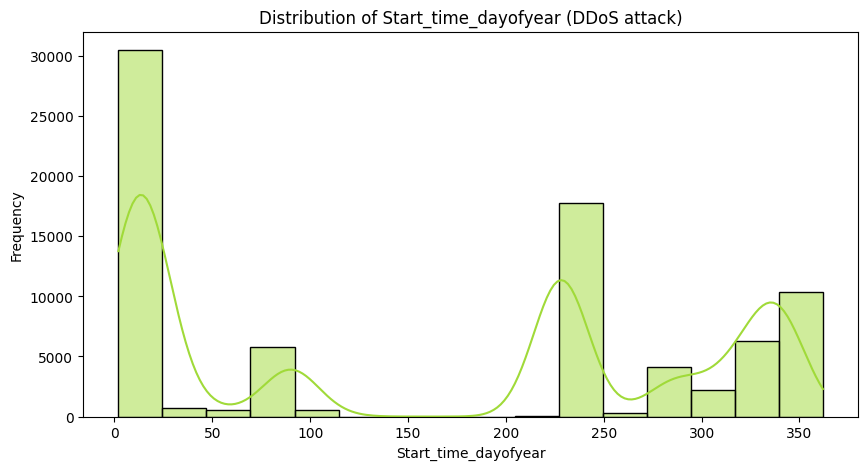

In [ ]:
plot_type_hist("Start_time_dayofyear", "DDoS attack", 16)

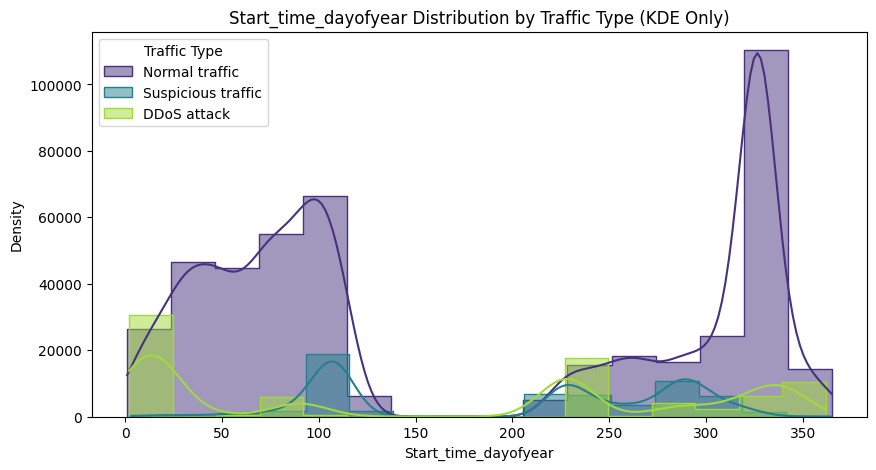

In [ ]:
plot_kde("Start_time_dayofyear", 16)

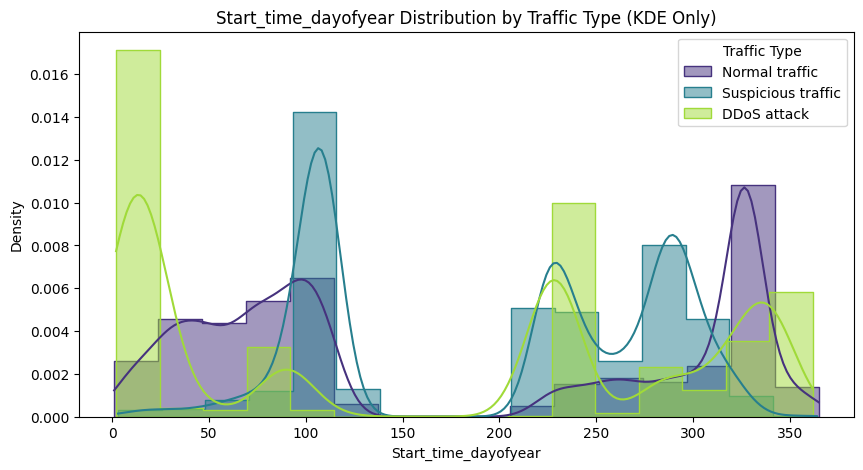

In [ ]:
plot_kde_norm("Start_time_dayofyear", 16)

# Start time dayofyear cos

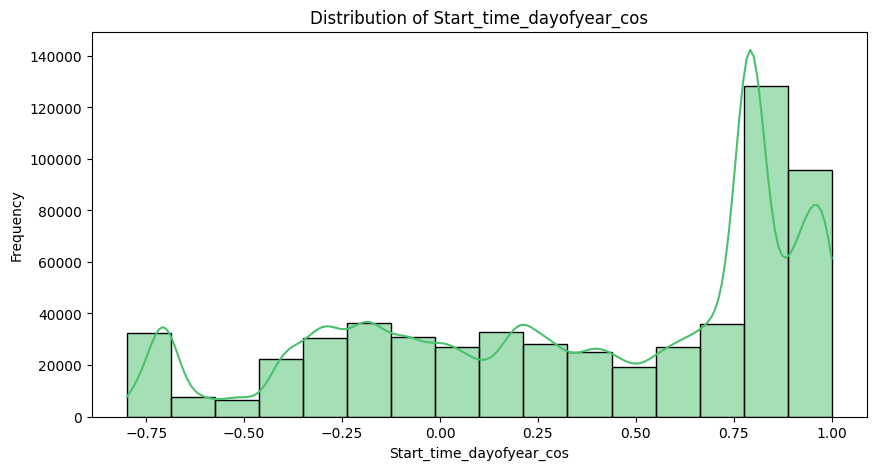

In [ ]:
plot_hist("Start_time_dayofyear_cos", 16)

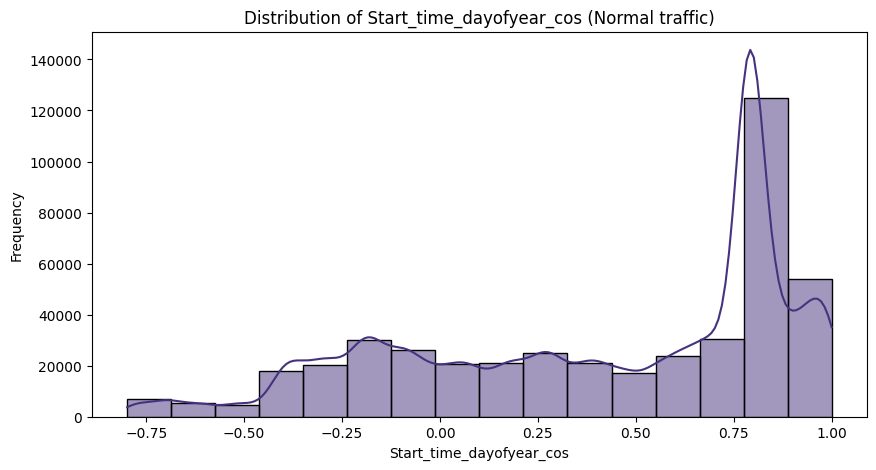

In [ ]:
plot_type_hist("Start_time_dayofyear_cos", "Normal traffic", 16)

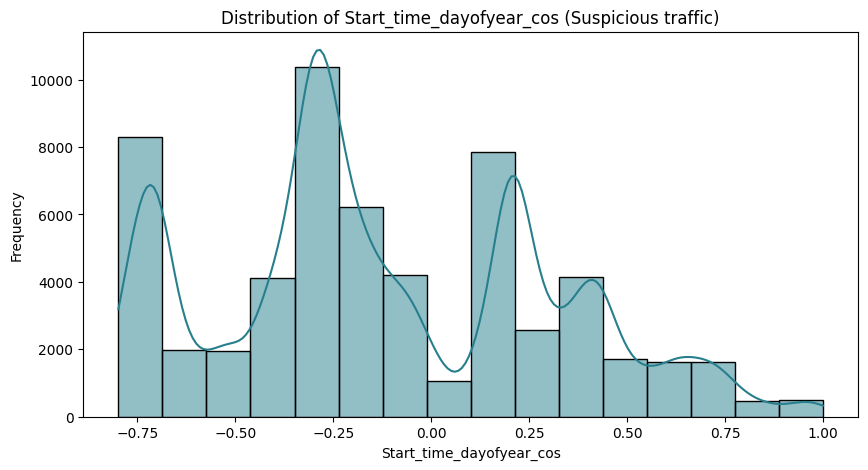

In [ ]:
plot_type_hist("Start_time_dayofyear_cos", "Suspicious traffic", 16)

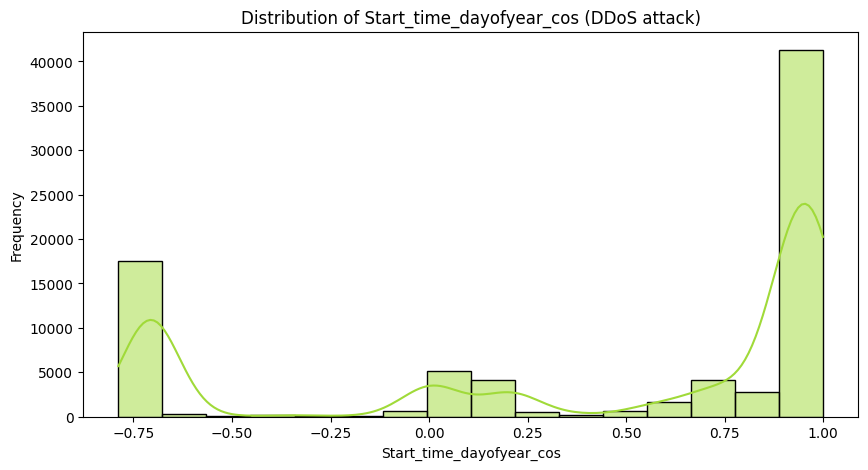

In [ ]:
plot_type_hist("Start_time_dayofyear_cos", "DDoS attack", 16)

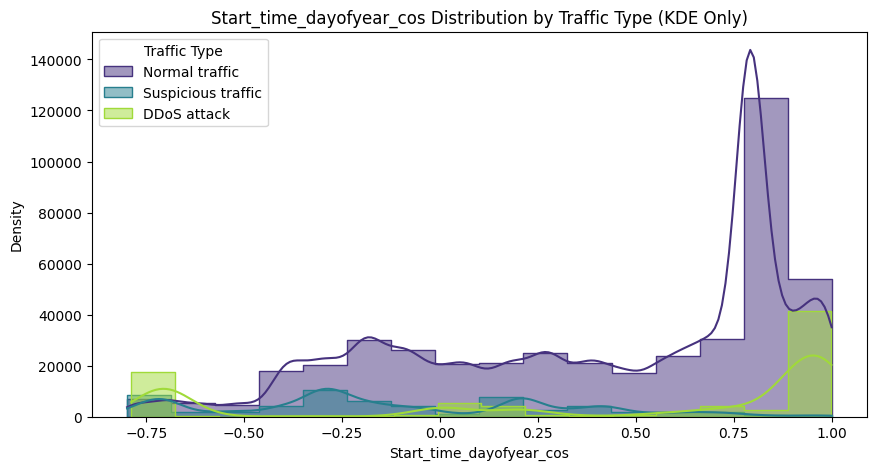

In [ ]:
plot_kde("Start_time_dayofyear_cos", 16)

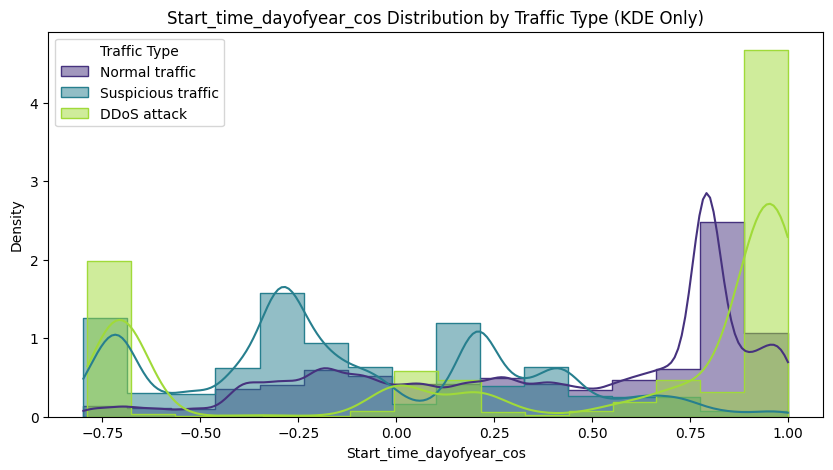

In [ ]:
plot_kde_norm("Start_time_dayofyear_cos", 16)

# Correlation matrix



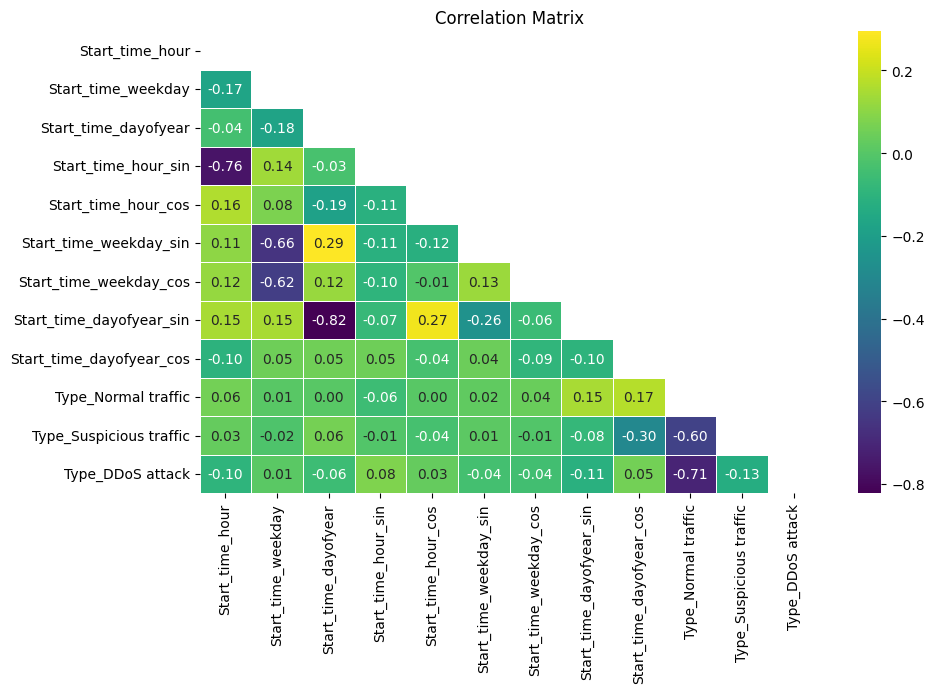

In [ ]:
numeric_columns = [ 'Start_time_hour', 'Start_time_weekday', 'Start_time_dayofyear',
                   'Start_time_hour_sin', 'Start_time_hour_cos', 'Start_time_weekday_sin',
                   'Start_time_weekday_cos', 'Start_time_dayofyear_sin', 'Start_time_dayofyear_cos',
                   'Type_Normal traffic', 'Type_Suspicious traffic', 'Type_DDoS attack']

corr_matrix = corr_matrix = df[numeric_columns].corr(numeric_only=True)  # Use only numeric columns

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, mask=mask)

plt.title("Correlation Matrix")
plt.show()

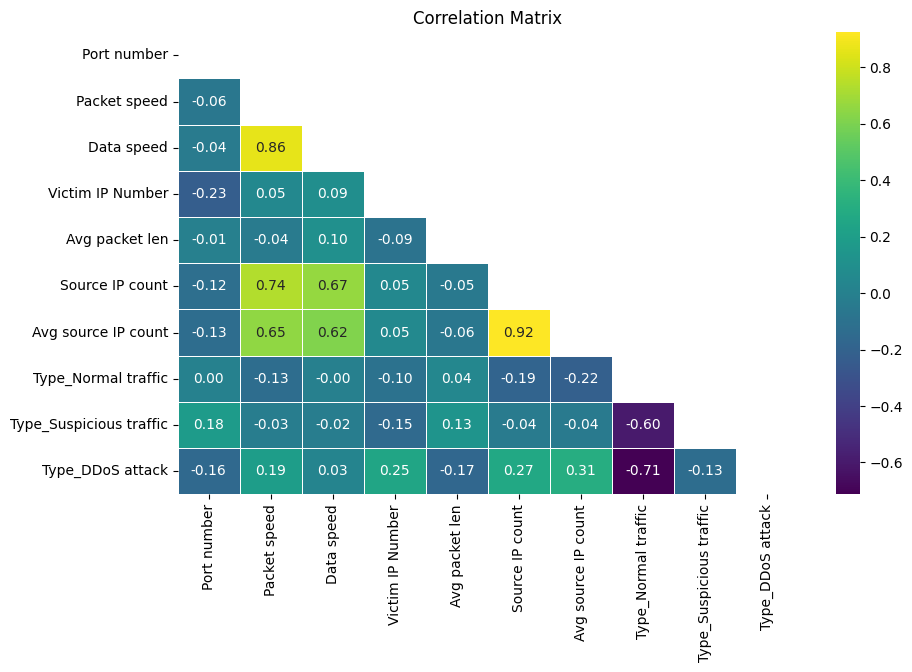

In [ ]:
numeric_columns = ['Port number', 'Packet speed', 'Data speed', 'Victim IP Number',
                   'Avg packet len', 'Source IP count', 'Avg source IP count', 'Type_Normal traffic',
                   'Type_Suspicious traffic', 'Type_DDoS attack']

corr_matrix = corr_matrix = df[numeric_columns].corr(numeric_only=True)  # Use only numeric columns

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, mask=mask)

plt.title("Correlation Matrix")
plt.show()